# Another Diagram in the Usual Convention

In this notebook, I will reproduce the diagram shown in common articles with the convention `Jz=1`.

I have to say that this is not a good convention because it contains limited information regarding our diagram so I will say it is indeed incomplete and not convenient.
However, to make people easier to understand the connection between my simulation and the papers other people have done before, I have to recreate such diagrams.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kitaev_ladder import run_atomic, finite_scaling, load_data, save_after_run

In [9]:
Jz = -1

Jx_list = np.linspace(-2, 2, 41)
for Jx in Jx_list:
    Jx = np.round(Jx, decimals=3)
Jy_list = np.linspace(-2, 2, 41)
for Jy in Jy_list:
    Jy = np.round(Jy, decimals=3)

L = 3
chi = 32

prefix = 'newdata/'
run_save = save_after_run(run_atomic, folder_prefix=prefix)

print(Jx_list)
print(np.linspace(-2, 2, 41))

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


In [10]:
def comb(
    Jx_list=Jx_list, 
    Jy_list=Jy_list, 
    Jz=-1, 
    chi=32,
    L=3,
    prefix = 'newdata/',
):
    
    S_dict = {}
    xi_dict = {}
    
    initial_psi = None
    for Jx in Jx_list:
        
        Jy = Jy_list[0]
        data = run_save(
            Jx=Jx, 
            Jy=Jy, 
            Jz=Jz, 
            L=L, 
            chi=chi, 
            initial_psi=initial_psi.copy() if initial_psi is not None else None,
        )
        if data == 0:
            # file exists; load the data
            data = load_data(
                Jx=Jx,
                Jy=Jy,
                Jz=Jz,
                L=L,
                chi=chi,
                prefix=prefix,
            )

        # output state of this DMRG serves as the input of the next
        initial_psi = data['psi'].copy()
        S_dict[(Jx, Jy, Jz, chi)] = np.mean(initial_psi.entanglement_entropy())
        xi_dict[(Jx, Jy, Jz, chi)] = initial_psi.correlation_length()


        initial_psi_a = data['psi'].copy()
        for Jy in Jy_list:
            
            data = run_save(
                Jx=Jx, 
                Jy=Jy, 
                Jz=Jz, 
                L=L, 
                chi=chi, 
                initial_psi=initial_psi_a.copy(),
            )
            if data == 0:
                # file exists; load the data
                data = load_data(
                    Jx=Jx,
                    Jy=Jy,
                    Jz=Jz,
                    L=L,
                    chi=chi,
                    prefix=prefix,
                )

            # output state of this DMRG serves as the input of the next
            initial_psi_a = data['psi'].copy()
            S_dict[(Jx, Jy, Jz, chi)] = np.mean(initial_psi_a.entanglement_entropy())
            xi_dict[(Jx, Jy, Jz, chi)] = initial_psi_a.correlation_length()

            pass

        pass
    
    return S_dict, xi_dict

In [39]:
Jx_list = [-2, -1.8, -1.6, -1.4, -1.2, -1.0, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
Jy_list = [-2, -1.8, -1.6, -1.4, -1.2, -1.0, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

S_dict, xi_dict = comb(
    Jx_list=Jx_list,
    Jy_list=Jy_list,
    chi=32,
)

This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971-3.116876372654103e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-5.418711965761236e-16j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 130 sweeps.
total size = 5052, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999925-2.84819910711942e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999994+2.8941187215300687e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 32, 20, 28, 20, 32, 20, 28, 20, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+1.742319634377568e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 32, 20, 28, 20, 32, 20, 28, 20, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2674007319403700, S = 0.9031769617704727, norm_err = 1.4e-14
Current memory usage 468.3 MB, time elapsed: 200.1 s
Delta E = -4.2074e-11, Delta S = 2.3093e-08 (per sweep)
max_trunc_err = 3.3710e-15, max_E_trunc = 5.6843e-12
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 30, 32]
DMRG finished after 160 sweeps.
total size = 6012, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 22, 32, 20, 28, 20, 32, 22, 31, 22, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-2.6790197520690847e-16j)
After the canonicalization:
Bond dim =  [20, 28, 22, 32, 20, 28, 20, 32, 22, 31, 22, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-2.3343443030582946e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

DMRG finished after 40 sweeps.
total size = 1692, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999929+3.5842334423706126e-17j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999958+3.399903832093051e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-6.350486071077119e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START========================

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 90 sweeps.
total size = 3732, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 31, 32, 32, 32, 31, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078+3.194059600142296e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 31, 32, 32, 32, 31, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-5.036929599026023e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+2.5713277973975912e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 31, 26, 32, 26, 32, 26, 32, 27, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.0350452427896097e-16j)
After the canonicalization:
Bond dim =  [28, 31, 26, 32, 26, 32, 26, 32, 27, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+1.6370793229537306e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 27, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+2.3981290028382803e-16j)
After the canonicalization:
Bond dim =  [28, 32, 27, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-3.9912329364739164e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1-2.919214449942006e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 70 sweeps.
total size = 3012, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999963-4.1186341785529913e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 't

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-8.127222500371261e-17j)
After the canonicalization:
Bond dim =  [29, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+9.239307312672781e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 70, age = 2772
Energy = -0.2329553593312047, S = 1.0265163160687567, norm_err = 5.6e-05
Current memory usage 468.3 MB, time elapsed: 41.0 s
Delta E = -2.3657e-10, Delta S = 4.0938e-04 (per sweep)
max_trunc_err = 6.5076e-08, max_E_trunc = 1.4104e-07
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 80, age = 3132
Energy = -0.2329553601557469, S = 1.0320327953629012, norm_err = 1.6e-04
Current memory usage 468.3 MB, time elapsed: 44.9 s
Delta E = -8.2454e-11, Delta S = 5.5165e-04 (per sweep)
max_trunc_err = 6.8312e-08, max_E_trunc = 1.4725e-07
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 90, age = 3492
Energy = -0.2329553609801470, S = 1.0331486960937497, norm_err = 5.0e-05
Current memory usage 468.3 MB, time elapsed: 48.9 s
Delta E = -8.2440e-11, Delta S = 1.1159e-04 (per sweep)
max_trunc_err = 7.0424e-08, max_E_trunc = 1.5129e-07
MPS bond dimen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984+3.261046129270781e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+8.359515920500046e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.87e-05
Call psi.canonical_form()
DMRG finished after 80 sweeps.
total size = 3732, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999979-9.690056916589196e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971-7.678755453928912e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999925+9.112910747808762e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-2.3077592209659203e-16j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-1.2959922289337902e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-9.542531113179226e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+7.885597218064942e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-1.2140132491864608e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-3.09030995105253e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967+4.031442360720901e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+1.6554118247836323e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 110 sweeps.
total size = 4332, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000124-3.49221519757581e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+2.6858755419955737e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-5.080831219562681e-16j)
After the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+5.3757464940132e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

Updating environment
.....
sweep 40, age = 1692
Energy = -0.2154360488871513, S = 0.6231418140077044, norm_err = 1.4e-11
Current memory usage 468.3 MB, time elapsed: 29.1 s
Delta E = 3.0809e-15, Delta S = 1.0601e-11 (per sweep)
max_trunc_err = 5.6641e-12, max_E_trunc = 1.3756e-11
MPS bond dimensions: [31, 32, 31, 32, 32, 32, 31, 32, 32, 32, 31, 32]
DMRG finished after 40 sweeps.
total size = 1692, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+1.0416996371342178e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+2.230163436872125e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-1.401988070228638e-15j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947+8.206212919953693e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056-3.2309902366425836e-16j)
After the canonicalization:
Bond dim =  [31, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999929+1.7366414405552503e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000095+4.5379319998752894e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+2.0874862900845819e-16j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999958+8.122146471734e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107-9.420834005430115e-18j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-5.137454118343289e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+3.2720115530861507e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.62e-05
Call psi.canonical_form()
DMRG finished after 130 sweeps.
total size = 5532, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082-1.1275702593849246e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=0.2 

Updating environment
.....
sweep 20, age = 972
Energy = -0.1998585059680119, S = nan, norm_err = 2.0e-12
Current memory usage 468.3 MB, time elapsed: 12.9 s
Delta E = -6.5725e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0734e-13, max_E_trunc = 1.0800e-12
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 1332
Energy = -0.1998585059681706, S = 0.5547683791522693, norm_err = 2.5e-15
Current memory usage 468.3 MB, time elapsed: 16.8 s
Delta E = -1.5871e-14, Delta S = nan (per sweep)
max_trunc_err = 1.5622e-13, max_E_trunc = 8.5265e-13
MPS bond dimensions: [31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 40, age = 1692
Energy = -0.1998585059681138, S = 0.5547683791638185, norm_err = 2.3e-15
Current memory usage 468.3 MB, time elapsed: 20.6 s
Delta E = 5.6843e-15, Delta S = 1.1549e-12 (per sweep)
max_trunc_err 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000087-1.1260149943887774e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-2.8044030493049053e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+6.348439569684501e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+2.316820087410106e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 130 sweeps.
total size = 5172, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000129+1.5174764656650241e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001+5.496799365915268e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999918+1.7799391358211526e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+7.662182371734344e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984-6.66769145040105e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 26, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006+2.5228368114200983e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 26, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999949-1.316892275306087e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 25, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-1.1862265315515713e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 25, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-9.090774176015077e-17j)
After the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-2.9213872781427734e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


norm_tol=1.00e-05 not reached, norm_err=1.13e-05
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 150 sweeps.
total size = 5772, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999999-1.645350333103209e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+4.641980883597991e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999994-2.4961836472968005e-16j)
After the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-5.708418816747557e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084-2.3377129634180784e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 27, 32, 26, 32, 26, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+4.888364781458496e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 27, 32, 26, 32, 26, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 27, 32, 28, 32, 28, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-2.518444561212259e-16j)
After the canonicalization:
Bond dim =  [28, 32, 27, 32, 28, 32, 28, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-5.797051281931064e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971-1.8482750096692017e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987+1.5680086419877956e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 130 sweeps.
total size = 5172, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-1.49890950346121e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 70 sweeps.
total size = 3012, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-2.263543085606612e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 't

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104-2.0910218966792958e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000149+1.2135574583035345e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 28, 21, 26, 20, 27, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-1.5697595947431687e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 28, 21, 26, 20, 27, 21, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 19, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+8.921811383541632e-17j)
After the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 19, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 19, 26, 18, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-2.99840819767983e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 19, 26, 18, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 28, 21, 26, 21, 27, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-7.218988980360972e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 28, 21, 26, 21, 27, 21, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999995+3.553851417284563e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+3.8615653979173735e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 90 sweeps.
total size = 3972, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967+5.3383404467755025e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069-4.278152441621512e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999999-2.461227448135926e-16j)
After the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.29e-05
Call psi.canonical_form()
DMRG finished after 80 sweeps.
total size = 3732, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-1.7954387976359953e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947-1.1429650871584503e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-3.849137647896537e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+9.777846375570562e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 26, 21, 26, 21, 27, 21, 26, 20, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084-1.2270848384977557e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 26, 21, 26, 21, 27, 21, 26, 20, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [17, 20, 18, 20, 18, 22, 18, 20, 18, 20, 18, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+2.1837842133618808e-16j)
After the canonicalization:
Bond dim =  [17, 20, 18, 20, 18, 22, 18, 20, 18, 20, 18, 20]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-3.253057165454232e-17j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-5.4072324800978366e-17j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-7.432544140357189e-17j)
After the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-1.4564584013763677e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+1.3342424603969316e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 21, 18, 22, 18, 20, 18, 20, 18, 20, 18, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011+1.9415689216963072e-17j)
After the canonicalization:
Bond dim =  [18, 21, 18, 22, 18, 20, 18, 20, 18, 20, 18, 22]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 21, 27, 21, 26, 20, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-4.705004646356732e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 21, 27, 21, 26, 20, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-5.49471793827383e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+1.8959994689173162e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000087-1.1604495865495676e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 140 sweeps.
total size = 5412, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+5.412337245047638e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000129+2.662639723995916e-17j)
After the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+1.1751814161385504e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+2.0534182901260289e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.81e-05
Call psi.canonical_form()
DMRG finished after 90 sweeps.
total size = 4092, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999997-3.5128150388530344e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+2.1568361581067974e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 24, 30]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-4.5917401677863205e-17j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 13, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000013-4.865551374181701e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 13, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056-3.2081181351582314e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+2.841170139911472e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133-5.432154708921262e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 24, 30]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 10, age = 612
Energy = -0.2479676661595107, S = nan, norm_err = 1.8e-11
Current memory usage 468.3 MB, time elapsed: 8.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7946e-11, max_E_trunc = 2.3604e-11
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 20, age = 972
Energy = -0.2479676661634826, S = nan, norm_err = 6.4e-11
Current memory usage 468.3 MB, time elapsed: 14.5 s
Delta E = -3.9719e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5520e-11, max_E_trunc = 2.2339e-11
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 1332
Energy = -0.2479676661680349, S = 0.9465413702414125, norm_err = 1.1e-12
Current memory usage 468.3 MB, time elapsed: 18.4 s
Delta E = -4.5522e-13, Delta S = nan (per sweep)
max_trunc_err = 5.4473e-12, max_E_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+1.862435768970815e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 32, 20, 28, 20, 32, 20, 28, 20, 32, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999999+3.2852554373432065e-16j)
After the canonicalization:
Bond dim =  [20, 32, 20, 28, 20, 32, 20, 28, 20, 32, 20, 28]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999992-9.297141784490236e-18j)
After the canonicalization:
Bond dim =  [30, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-2.0787621665604646e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135-4.46144091848184e-17j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
DMRG finished after 90 sweeps.
total size = 3852, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978-2.099286456475058e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-8.401042297122121e-17j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 19, 26, 18, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-3.2374930465382724e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 19, 26, 18, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+8.414588775053586e-17j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 14, 11, 12, 11, 14, 11, 12, 11, 14, 10, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000087-2.4395716727281303e-16j)
After the canonicalization:
Bond dim =  [10, 14, 11, 12, 11, 14, 11, 12, 11, 14, 10, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+1.6419482800183592e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-2.8386273582786346e-16j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-5.78799346450429e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-7.062798233505086e-17j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-2.411137626546706e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 19, 26, 18, 27, 18, 26, 18, 27, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014-6.740047892181176e-16j)
After the canonicalization:
Bond dim =  [18, 28, 19, 26, 18, 27, 18, 26, 18, 27, 18, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000127+1.7817045299882023e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 140 sweeps.
total size = 5892, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1-1.4460546475525415e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+1.682635127599238e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+2.8841812488294862e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 27, 32, 26, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999992-8.988132256890064e-17j)
After the canonicalization:
Bond dim =  [29, 32, 27, 32, 26, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 32, 20, 28, 20, 32, 20, 28, 20, 32, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976+1.1542167568014276e-16j)
After the canonicalization:
Bond dim =  [21, 32, 20, 28, 20, 32, 20, 28, 20, 32, 20, 28]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [12, 19, 14, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+2.404401735469541e-16j)
After the canonicalization:
Bond dim =  [12, 19, 14, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [17, 19, 12, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+1.1024037594102973e-16j)
After the canonicalization:
Bond dim =  [17, 19, 12, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549373555191, S = 0.6722312068694308, norm_err = 8.3e-05
Current memory usage 468.3 MB, time elapsed: 85.2 s
Delta E = -1.3714e-11, Delta S = 3.2411e-04 (per sweep)
max_trunc_err = 1.6776e-09, max_E_trunc = 2.8517e-09
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549374572357, S = 0.6750414093499310, norm_err = 8.7e-05
Current memory usage 468.3 MB, time elapsed: 89.1 s
Delta E = -1.0172e-11, Delta S = 2.8102e-04 (per sweep)
max_trunc_err = 1.7428e-09, max_E_trunc = 2.9585e-09
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549375326717, S = 0.6774819389538697, norm_err = 7.9e-05
Current memory usage 468.3 MB, time elapsed: 93.0 s
Delta E = -7.5436e-12, Delta S = 2.4405e-04 (per sweep)
max_trunc_err = 1.8014e-09, max_E_trunc = 3.0511e-09
MPS bond di

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.81e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-3.8467493079785697e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-0.6 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [17, 20, 13, 14, 11, 17, 11, 14, 11, 18, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000187-1.872908298183543e-17j)
After the canonicalization:
Bond dim =  [17, 20, 13, 14, 11, 17, 11, 14, 11, 18, 11, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082-2.3455041120449637e-17j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-7.322383131652306e-17j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envir

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 20, 11, 14, 11, 18, 11, 14, 11, 17, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024+6.245767998378206e-16j)
After the canonicalization:
Bond dim =  [20, 20, 11, 14, 11, 18, 11, 14, 11, 17, 11, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.75e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 90 sweeps.
total size = 4092, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+1.2162376683035048e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMR

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 24, 15, 15, 10, 15, 10, 15, 13, 16, 13, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+5.432138205222974e-17j)
After the canonicalization:
Bond dim =  [20, 24, 15, 15, 10, 15, 10, 15, 13, 16, 13, 15]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [14, 20, 14, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014+3.222084707097891e-16j)
After the canonicalization:
Bond dim =  [14, 20, 14, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [22, 32, 20, 28, 20, 32, 20, 28, 20, 32, 21, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+7.313123165470994e-17j)
After the canonicalization:
Bond dim =  [22, 32, 20, 28, 20, 32, 20, 28, 20, 32, 21, 28]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 28, 32, 28, 32, 28, 32, 28, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+4.151815889969964e-16j)
After the canonicalization:
Bond dim =  [26, 32, 28, 32, 28, 32, 28, 32, 28, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-3.7081098992254907e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073+3.282621556535428e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 1332
Energy = -0.1663876672125232, S = 0.5509053865302961, norm_err = 6.1e-15
Current memory usage 468.3 MB, time elapsed: 21.1 s
Delta E = -1.4211e-15, Delta S = nan (per sweep)
max_trunc_err = 1.4777e-14, max_E_trunc = 6.5370e-13
MPS bond dimensions: [31, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Updating environment
.....
sweep 40, age = 1692
Energy = -0.1663876672125468, S = 0.5509053865318400, norm_err = 6.4e-15
Current memory usage 468.3 MB, time elapsed: 25.0 s
Delta E = -2.3676e-15, Delta S = 1.5439e-13 (per sweep)
max_trunc_err = 1.5023e-14, max_E_trunc = 1.0800e-12
MPS bond dimensions: [31, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31, 32]
DMRG finished after 40 sweeps.
total size = 1692, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999933+8.895968258061077e-17j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 18, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999905+5.435441189616723e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 18, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000009+1.2532139419557248e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000122-3.63056053747886e-17j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+2.519546997576974e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+9.801656999201977e-17j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-2.9391882008135194e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 13]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+4.662320606149298e-17j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 13]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+2.9810408501798515e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 18, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+7.733937314530935e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 18, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993-2.1934016669347068e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

norm_tol=1.00e-05 not reached, norm_err=1.79e-05
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
DMRG finished after 150 sweeps.
total size = 6012, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-3.2764589652511944e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+3.2098822867951236e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113-9.547692409497231e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 27, 32, 26, 32, 28, 32, 28, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000042-6.496014621952026e-16j)
After the canonicalization:
Bond dim =  [29, 32, 27, 32, 26, 32, 28, 32, 28, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [22, 32, 20, 28, 20, 32, 20, 28, 20, 32, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-3.677001092686797e-17j)
After the canonicalization:
Bond dim =  [22, 32, 20, 28, 20, 32, 20, 28, 20, 32, 20, 28]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-3.369513133935698e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.81e-04
Call psi.canonical_form()
DMRG finished after 100 sweeps.
total size = 4452, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+2.2768245622195593e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947+3.113390761749123e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 24, 30]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-1.567877175571695e-17j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 10, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+1.1342848504131366e-17j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 10, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-5.217632712411498e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+2.7222984295839023e-17j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 25, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-9.880919884545539e-17j)
After the canonicalization:
Bond dim =  [24, 32, 24, 30, 24, 32, 24, 30, 24, 32, 25, 30]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

Updating environment
.....
sweep 10, age = 612
Energy = -0.2479676661595001, S = nan, norm_err = 1.8e-11
Current memory usage 468.3 MB, time elapsed: 8.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7947e-11, max_E_trunc = 2.3704e-11
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 20, age = 972
Energy = -0.2479676661633986, S = nan, norm_err = 6.4e-11
Current memory usage 468.3 MB, time elapsed: 14.3 s
Delta E = -3.8985e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5518e-11, max_E_trunc = 2.2339e-11
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 1332
Energy = -0.2479676661680562, S = 0.9465413702303529, norm_err = 2.8e-13
Current memory usage 468.3 MB, time elapsed: 18.5 s
Delta E = -4.6576e-13, Delta S = nan (per sweep)
max_trunc_err = 5.4473e-12, max_E_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-8.17433278171148e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-5.273462643657999e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999988-5.123626636895875e-17j)
After the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 40, age = 1692
Energy = -0.2154360488871466, S = 0.6231418144228018, norm_err = 1.5e-11
Current memory usage 468.3 MB, time elapsed: 29.3 s
Delta E = 0.0000e+00, Delta S = 3.2520e-11 (per sweep)
max_trunc_err = 5.6674e-12, max_E_trunc = 1.4438e-11
MPS bond dimensions: [31, 32, 32, 32, 31, 32, 32, 32, 31, 32, 32, 32]
DMRG finished after 40 sweeps.
total size = 1692, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+7.921587695090162e-17j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-1.8020312748762186e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 25, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999942-4.596176741387869e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 25, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 21, 27, 21, 26, 20, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-6.543491116232078e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 21, 27, 21, 26, 20, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 20, 18, 20, 18, 21, 18, 20, 18, 20, 18, 21]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-3.154811005042288e-16j)
After the canonicalization:
Bond dim =  [18, 20, 18, 20, 18, 21, 18, 20, 18, 20, 18, 21]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+3.369186838360675e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082+2.56336499529123e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969-3.8629202257328384e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000158+1.2672142212464416e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-4.051658810472927e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 21, 18, 21, 18, 20, 18, 20, 18, 21, 18, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005-4.0731072164292568e-16j)
After the canonicalization:
Bond dim =  [18, 21, 18, 21, 18, 20, 18, 20, 18, 21, 18, 20]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 21, 28, 21, 26, 20, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000149+1.1194490895748314e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 21, 28, 21, 26, 20, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1-4.999449899236161e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+2.534675699817846e-17j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000167-5.21838123907472e-17j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 110 sweeps.
total size = 4812, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-1.8691645453650096e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 



/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000016-1.2909124626859845e-16j)
After the canonicalization:
Bond dim =  [30, 32, 32, 32, 30, 32, 32, 32, 30, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+9.625795145713919e-17j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 70 sweeps.
total size = 2892, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-4.52044543290675e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-3.0152836591257115e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-3.77328036480963e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 21, 26, 21, 27, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999936+2.6094281866221274e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 21, 26, 21, 27, 21, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+4.594835565069904e-16j)
After the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 27]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+2.0838412955700618e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 20, 27, 21, 26, 21, 27, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014+1.8070804139999233e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 20, 27, 21, 26, 21, 27, 21, 26]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 32, 24, 32, 25, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+2.2558255979674165e-16j)
After the canonicalization:
Bond dim =  [25, 32, 24, 32, 25, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000017+2.339162798393575e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 90 sweeps.
total size = 3972, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999951+2.5934115965853266e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.62e-05
Call psi.canonical_form()
DMRG finished after 70 sweeps.
total size = 3372, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-1.8897643866422342e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-1.95779555480456e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001+7.393885481673655e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967+1.3522297659907718e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 28, 32, 28, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+1.994433965441843e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 28, 32, 28, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+2.2087231132603136e-17j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993+2.2338843528417704e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 25, 32, 24, 32, 25, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976+6.711479643926302e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 25, 32, 24, 32, 25, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+9.640671808729405e-17j)
After the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993+7.270020064160241e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.94e-05
Call psi.canonical_form()
DMRG finished after 110 sweeps.
total size = 4812, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033-1.9027748127120603e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-4.0136840734395103e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+1.9598467858649894e-16j)
After the canonicalization:
Bond dim =  [24, 30, 24, 32, 24, 30, 24, 32, 24, 30, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-4.3201409538354e-18j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987+1.9265332858803747e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 32, 24, 32, 24, 32, 24, 32, 24, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 26, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-1.3867199895973778e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 26, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-6.359220294120193e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-1.6906023628233796e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002-2.2338611808804155e-17j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+2.836873088099877e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 130 sweeps.
total size = 5172, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138+1.3877787807814457e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944-2.5186317202503073e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967-3.6843758454333687e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 27, 32, 28, 32, 27, 32, 27, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-1.7970252886626062e-16j)
After the canonicalization:
Bond dim =  [28, 32, 27, 32, 28, 32, 27, 32, 27, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989-2.4778365219995517e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
..

Updating environment
.....
sweep 40, age = 1692
Energy = -0.1998585059680570, S = 0.5547683791637538, norm_err = 2.5e-15
Current memory usage 468.3 MB, time elapsed: 20.7 s
Delta E = 5.9203e-15, Delta S = 1.1607e-12 (per sweep)
max_trunc_err = 1.5812e-13, max_E_trunc = 1.2506e-12
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
DMRG finished after 40 sweeps.
total size = 1692, maximum chi = 32


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-1.6974827386161648e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-1.6225488429270054e-16j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999929+1.491873568066209e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999916-1.159198761764856e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098-4.9379992946771006e-18j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999973-1.738162302424296e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+8.834956387590936e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-3.978818155718868e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 31, 32, 31, 32, 31, 32, 31, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+3.041714077124163e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999956-7.344062394723048e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-1.2741969081486577e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+3.596418766101378e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 110 sweeps.
total size = 4332, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000124+5.542441505745899e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+3.7464397192890127e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962+5.687447975600246e-16j)
After the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000009+1.6428952560299353e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.74e-04
Call psi.canonical_form()
DMRG finished after 80 sweeps.
total size = 3732, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-4.4885969940899884e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-1.5015800896397282e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971+3.023218143335879e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107-1.406643884245866e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109-1.7263370884480149e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 32, 31, 32, 31, 32, 31, 32, 30, 32, 31, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-9.552702053862439e-16j)
After the canonicalization:
Bond dim =  [31, 32, 31, 32, 31, 32, 31, 32, 30, 32, 31, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-2.915091825414519e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-1.3753441138544849e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000009+4.46902453976504e-16j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+3.3918118646389777e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133+6.052655818582374e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+1.1932522442756267e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 10, age = 612
Energy = -0.2223368708226611, S = nan, norm_err = 3.7e-12
Current memory usage 468.3 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9125e-13, max_E_trunc = 6.2528e-13
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.....
sweep 20, age = 972
Energy = -0.2223368708231419, S = nan, norm_err = 6.4e-12
Current memory usage 468.3 MB, time elapsed: 13.4 s
Delta E = -4.8081e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0979e-13, max_E_trunc = 4.2633e-13
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 31, 32, 32, 32, 32, 32]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 1332
Energy = -0.2223368708232746, S = 0.9315484557976493, norm_err = 5.5e-12
Current memory usage 468.3 MB, time elapsed: 17.7 s
Delta E = -1.3264e-14, Delta S = nan (per sweep)
max_trunc_err = 7.7975e-14, max_E_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005-1.2886601450229305e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-7.662180010571233e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.01e-05
Call psi.canonical_form()
DMRG finished after 70 sweeps.
total size = 3372, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999961+1.6132928326584306e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.0 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056-8.063398061409426e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+5.43434036071979e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-1.91131811763448e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999933+5.563319132820106e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+2.5873461896121506e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-8.388821848197937e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999981+3.1963412054788764e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+2.1773586186005692e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 31, 32, 32, 32, 30, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987+4.740131898106625e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 31, 32, 32, 32, 30, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-3.059842603338358e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+1.5880647553710507e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 31, 26, 32, 27, 32, 26, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084-2.4444683002851943e-17j)
After the canonicalization:
Bond dim =  [26, 31, 26, 32, 27, 32, 26, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-1.3594441884746277e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 26, 32, 27, 32, 27, 32, 28, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+2.298150145016183e-16j)
After the canonicalization:
Bond dim =  [29, 32, 26, 32, 27, 32, 27, 32, 28, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+1.0289269686246114e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999977-2.4692293145303716e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 30, 32, 32, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
Updating environment
.....
DMRG finished after 70 sweeps.
total size = 3012, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993+3.0623290361853073e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDM

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098+1.7998645701016495e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 32, 30, 32, 30, 32, 30, 32, 30, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+1.9847168703463157e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107-2.0551740577796034e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+3.3379324530891325e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999958+1.9422036719007544e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000087-1.6489701811019862e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+3.7690817507236337e-16j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 130 sweeps.
total size = 5052, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-3.239731616658248e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113+1.8956694346411622e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 32, 20, 28, 20, 32, 20, 28, 20, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999915-5.980514327783817e-17j)
After the canonicalization:
Bond dim =  [20, 28, 20, 32, 20, 28, 20, 32, 20, 28, 20, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 32, 20, 28, 20, 32, 20, 28, 20, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000202+1.6579721882383527e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 32, 20, 28, 20, 32, 20, 28, 20, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+3.2104429906062e-16j)
After the canonicalization:
Bond dim =  [26, 32, 26, 32, 26, 32, 26, 32, 26, 32, 26, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDM

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


....
DMRG finished after 70 sweeps.
total size = 2892, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-2.3375398838787476e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-3.313687460178727e-16j)
After the canonicalization:
Bond dim =  [29, 32, 29, 32, 29, 32, 29, 32, 29, 32, 29, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+1.4120895530556603e-16j)
After the canonicalization:
Bond dim =  [28, 32, 28, 32, 28, 32, 28, 32, 28, 32, 28, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
This file already existed. Pass.


In [40]:
S_dict2, xi_dict2 = comb(
    Jx_list=Jx_list,
    Jy_list=Jy_list,
    chi=64
)

This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000042+7.005297312482844e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 51, 64, 52, 64, 51, 64, 51, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+4.2099402770037484e-16j)
After the canonicalization:
Bond dim =  [51, 64, 51, 64, 52, 64, 51, 64, 51, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Upda

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270847584830, S = 1.1295188134537657, norm_err = 9.0e-05
Current memory usage 468.3 MB, time elapsed: 115.0 s
Delta E = -5.7274e-11, Delta S = 5.4435e-04 (per sweep)
max_trunc_err = 4.3076e-09, max_E_trunc = 1.3120e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270850858537, S = 1.1305915708015082, norm_err = 9.9e-06
Current memory usage 468.3 MB, time elapsed: 120.9 s
Delta E = -3.2737e-11, Delta S = 1.0728e-04 (per sweep)
max_trunc_err = 4.4014e-09, max_E_trunc = 1.3455e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270853728561, S = 1.1347153368991254, norm_err = 9.9e-05
Current memory usage 468.3 MB, time elapsed: 126.9 s
Delta E = -2.8700e-11, Delta S = 4.1238e-04 (per sweep)
max_trunc_err = 4.5391e-09, max_E_trunc = 1.3854e-08
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.83e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038-3.3350058825654116e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-0.6 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 64, 48, 64, 48, 64, 48, 64, 48, 64, 47, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-1.703181683890008e-16j)
After the canonicalization:
Bond dim =  [49, 64, 48, 64, 48, 64, 48, 64, 48, 64, 47, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+4.086857194643537e-17j)
After the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2630872989840990, S = 0.8333561065278084, norm_err = 1.9e-06
Current memory usage 468.3 MB, time elapsed: 291.3 s
Delta E = -3.3350e-04, Delta S = -4.2408e-03 (per sweep)
max_trunc_err = 8.1568e-08, max_E_trunc = -1.1000e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2441694186832043, S = 1.1415496242302952, norm_err = 4.1e-03
Current memory usage 468.3 MB, time elapsed: 309.0 s
Delta E = 1.8918e-03, Delta S = 3.0819e-02 (per sweep)
max_trunc_err = 1.1460e-07, max_E_trunc = -1.0994e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = 0.0609146788001264, S = 1.9285309128413732, norm_err = 6.2e-04
Current memory usage 468.3 MB, time elapsed: 326.8 s
Delta E = 3.0508e-02, Delta S = 7.8698e-02 (per sweep)
max_trunc_err = 1.7596e-07, max_E_trunc = -1.6184e-09
MPS bon

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 7932, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-7.343572364787443e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 49, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-2.3472541982797843e-17j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 49, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270346975356, S = 1.4370973502578070, norm_err = 2.5e-05
Current memory usage 468.3 MB, time elapsed: 106.8 s
Delta E = -2.3960e-12, Delta S = 9.1330e-05 (per sweep)
max_trunc_err = 2.0023e-08, max_E_trunc = 5.9496e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=2.53e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 160 sweeps.
total size = 6492, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+4.609214485779001e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 51, 64, 52, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971-1.1086716536840739e-16j)
After the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 51, 64, 52, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 49, 64, 49, 64, 48, 64, 49, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-2.54469956397372e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 49, 64, 49, 64, 48, 64, 49, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 49, 64, 48, 64, 49, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.2429123928478106e-15j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 49, 64, 48, 64, 49, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [46, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000042-5.984795992119984e-17j)
After the canonicalization:
Bond dim =  [46, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 43, 58, 43, 61, 43, 58, 43, 60, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002-3.496551390160841e-16j)
After the canonicalization:
Bond dim =  [43, 61, 43, 58, 43, 61, 43, 58, 43, 60, 43, 59]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 62, 43, 60, 43, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+3.893127620450709e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 62, 43, 60, 43, 62]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 62, 48, 64, 48, 63, 49, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+2.092089919266763e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 62, 48, 64, 48, 63, 49, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [52, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115-1.0163015262728469e-16j)
After the canonicalization:
Bond dim =  [52, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602659950688159, S = 1.1222215388810468, norm_err = 3.9e-05
Current memory usage 468.3 MB, time elapsed: 113.4 s
Delta E = -4.0944e-11, Delta S = 2.2577e-04 (per sweep)
max_trunc_err = 3.1041e-09, max_E_trunc = 8.3087e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602659953841264, S = 1.1254338636576335, norm_err = 2.4e-05
Current memory usage 468.3 MB, time elapsed: 119.4 s
Delta E = -3.1531e-11, Delta S = 3.2123e-04 (per sweep)
max_trunc_err = 3.2484e-09, max_E_trunc = 8.6573e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602659956142570, S = 1.1278643750077511, norm_err = 1.9e-05
Current memory usage 468.3 MB, time elapsed: 125.1 s
Delta E = -2.3013e-11, Delta S = 2.4305e-04 (per sweep)
max_trunc_err = 3.3418e-09, max_E_trunc = 8.9133e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.61e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082+5.648693318649478e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [54, 64, 54, 64, 55, 64, 54, 64, 55, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999949-1.9270668813467896e-17j)
After the canonicalization:
Bond dim =  [54, 64, 54, 64, 55, 64, 54, 64, 55, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 51, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-1.4615846844716095e-16j)
After the canonicalization:
Bond dim =  [38, 51, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 34, 27, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999996+1.669470760529755e-16j)
After the canonicalization:
Bond dim =  [28, 34, 27, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-1.7124665577838284e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 34, 27, 36, 27, 34, 27, 36, 28, 34, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-2.018635154466668e-16j)
After the canonicalization:
Bond dim =  [28, 34, 27, 36, 27, 34, 27, 36, 28, 34, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 53, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-7.528041723485698e-17j)
After the canonicalization:
Bond dim =  [38, 53, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 64, 55, 64, 54, 64, 54, 64, 55, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000144-2.698150933940348e-16j)
After the canonicalization:
Bond dim =  [55, 64, 55, 64, 54, 64, 54, 64, 55, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602659739760043, S = 1.3256992825595197, norm_err = 8.1e-04
Current memory usage 468.3 MB, time elapsed: 122.9 s
Delta E = -4.5509e-11, Delta S = -8.9691e-04 (per sweep)
max_trunc_err = 1.2869e-08, max_E_trunc = 3.6841e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602659766646316, S = 1.3206387990237898, norm_err = 2.5e-04
Current memory usage 468.3 MB, time elapsed: 129.0 s
Delta E = -2.6886e-10, Delta S = -5.0605e-04 (per sweep)
max_trunc_err = 1.2598e-08, max_E_trunc = 3.5960e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602659779466118, S = 1.3139790793054840, norm_err = 4.2e-04
Current memory usage 468.3 MB, time elapsed: 134.6 s
Delta E = -1.2820e-10, Delta S = -6.6597e-04 (per sweep)
max_trunc_err = 1.2400e-08, max_E_trunc = 3.5428e-08
MPS b

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.81e-04
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+3.8033812210791496e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [52, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118-3.169237385329906e-17j)
After the canonicalization:
Bond dim =  [52, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 63, 48, 64, 48, 63, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007+6.224185202696151e-16j)
After the canonicalization:
Bond dim =  [48, 63, 48, 64, 48, 63, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 63, 43, 60, 43, 62, 43, 60, 43, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947-2.837511216692452e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 63, 43, 60, 43, 62, 43, 60, 43, 62]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 44, 58, 43, 60, 43, 60, 43, 60, 44, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+6.063728352213046e-17j)
After the canonicalization:
Bond dim =  [43, 61, 44, 58, 43, 60, 43, 60, 43, 60, 44, 58]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [47, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+2.1510571102112408e-16j)
After the canonicalization:
Bond dim =  [47, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 64, 48, 64, 48, 64, 49, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+5.186299678490859e-16j)
After the canonicalization:
Bond dim =  [49, 64, 48, 64, 48, 64, 49, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 58, 43, 61, 43, 59, 43, 60, 43, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-3.3706566329208988e-16j)
After the canonicalization:
Bond dim =  [43, 58, 43, 61, 43, 59, 43, 60, 43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 58, 38, 56, 41, 58, 40, 56, 40, 57, 39, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+1.238834436029598e-16j)
After the canonicalization:
Bond dim =  [40, 58, 38, 56, 41, 58, 40, 56, 40, 57, 39, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 43, 63, 42, 57, 42, 61, 43, 56, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135-3.1576582864069086e-16j)
After the canonicalization:
Bond dim =  [43, 56, 43, 63, 42, 57, 42, 61, 43, 56, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554804262936, S = 1.1166733800079280, norm_err = 7.1e-05
Current memory usage 468.3 MB, time elapsed: 114.2 s
Delta E = -3.2789e-11, Delta S = 3.3738e-04 (per sweep)
max_trunc_err = 2.5685e-09, max_E_trunc = 5.3196e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554807472599, S = 1.1196634129780267, norm_err = 6.6e-05
Current memory usage 468.3 MB, time elapsed: 119.9 s
Delta E = -3.2097e-11, Delta S = 2.9900e-04 (per sweep)
max_trunc_err = 2.6661e-09, max_E_trunc = 5.4988e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554809565385, S = 1.1224042675055588, norm_err = 4.7e-05
Current memory usage 468.3 MB, time elapsed: 125.5 s
Delta E = -2.0928e-11, Delta S = 2.7409e-04 (per sweep)
max_trunc_err = 2.7684e-09, max_E_trunc = 5.6900e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.86e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012+1.233822072288504e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 46, 28, 38, 28, 46, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998-2.7455444809951667e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 46, 28, 38, 28, 46, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 47, 28, 38, 28, 45, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+4.609009439155616e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 47, 28, 38, 28, 45, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.55e-04
Call psi.canonical_form()
DMRG finished after 110 sweeps.
total size = 4812, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999968+7.28583859910259e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.0 f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 43, 60, 43, 56, 42, 60, 43, 56, 43, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+6.47900492986274e-16j)
After the canonicalization:
Bond dim =  [43, 56, 43, 60, 43, 56, 42, 60, 43, 56, 43, 62]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 58, 38, 55, 41, 58, 39, 56, 40, 58, 39, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998+2.2329544835348136e-16j)
After the canonicalization:
Bond dim =  [40, 58, 38, 55, 41, 58, 39, 56, 40, 58, 39, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 58, 43, 61, 43, 60, 43, 60, 43, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-1.2600164703843687e-16j)
After the canonicalization:
Bond dim =  [43, 58, 43, 61, 43, 60, 43, 60, 43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 52, 64, 51, 64, 51, 64, 51, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+1.1889073927033083e-15j)
After the canonicalization:
Bond dim =  [51, 64, 52, 64, 51, 64, 51, 64, 51, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 63, 43, 60, 43, 62, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007+2.74435981848315e-16j)
After the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 63, 43, 60, 43, 62, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 56, 40, 58, 39, 56, 41, 58, 39, 56, 39, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999956-5.191944820678131e-16j)
After the canonicalization:
Bond dim =  [40, 56, 40, 58, 39, 56, 41, 58, 39, 56, 39, 58]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084-9.302454639925628e-17j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 44, 37, 49, 37, 44, 36, 49, 37, 44, 36, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984+5.307360798319335e-16j)
After the canonicalization:
Bond dim =  [36, 44, 37, 49, 37, 44, 36, 49, 37, 44, 36, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 46, 34, 51, 34, 46, 33, 50, 35, 46, 34, 51]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000144+1.216500689133582e-16j)
After the canonicalization:
Bond dim =  [36, 46, 34, 51, 34, 46, 33, 50, 35, 46, 34, 51]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 46, 38, 48, 37, 46, 38, 48, 37, 46, 38, 47]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-1.265182341684537e-16j)
After the canonicalization:
Bond dim =  [38, 46, 38, 48, 37, 46, 38, 48, 37, 46, 38, 47]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 44, 60, 43, 60, 43, 60, 43, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013+1.521432942137687e-16j)
After the canonicalization:
Bond dim =  [43, 60, 44, 60, 43, 60, 43, 60, 43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664270695355, S = 1.1116095201776788, norm_err = 8.6e-05
Current memory usage 468.3 MB, time elapsed: 115.6 s
Delta E = -3.8564e-11, Delta S = 3.6753e-04 (per sweep)
max_trunc_err = 2.0528e-09, max_E_trunc = 3.8108e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664273319816, S = 1.1150730411270202, norm_err = 8.0e-05
Current memory usage 468.3 MB, time elapsed: 121.4 s
Delta E = -2.6245e-11, Delta S = 3.4635e-04 (per sweep)
max_trunc_err = 2.1511e-09, max_E_trunc = 3.9884e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664275025687, S = 1.1183637856506430, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 127.1 s
Delta E = -1.7059e-11, Delta S = 3.2907e-04 (per sweep)
max_trunc_err = 2.2458e-09, max_E_trunc = 4.1575e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 7812, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 64, 64, 64, 64, 63, 64, 62, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-8.673617379884035e-17j)
After the canonicalization:
Bond dim =  [62, 64, 64, 64, 64, 64, 63, 64, 62, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 54, 38, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-1.6232701391428222e-16j)
After the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 54, 38, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089-3.041217288915151e-16j)
After the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 54, 38, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000013+6.132100540695105e-18j)
After the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 54, 38, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664112767853, S = 1.4276240462700738, norm_err = 1.7e-04
Current memory usage 468.3 MB, time elapsed: 118.1 s
Delta E = -5.9837e-12, Delta S = 1.1215e-04 (per sweep)
max_trunc_err = 1.1487e-08, max_E_trunc = 2.4018e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664115696616, S = 1.4308413292320716, norm_err = 2.0e-04
Current memory usage 468.3 MB, time elapsed: 123.9 s
Delta E = -2.9288e-11, Delta S = 3.2173e-04 (per sweep)
max_trunc_err = 1.1670e-08, max_E_trunc = 2.4318e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664115126002, S = 1.4323957623655301, norm_err = 1.6e-04
Current memory usage 468.3 MB, time elapsed: 129.4 s
Delta E = 5.7061e-12, Delta S = 1.5544e-04 (per sweep)
max_trunc_err = 1.1767e-08, max_E_trunc = 2.4517e-08
MPS bond 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.39e-04
Call psi.canonical_form()
DMRG finished after 190 sweeps.
total size = 7692, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+1.7867651802561113e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082+1.4727025527766452e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 46, 38, 48, 36, 46, 38, 48, 37, 47, 38, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+2.5336477747687155e-16j)
After the canonicalization:
Bond dim =  [36, 46, 38, 48, 36, 46, 38, 48, 37, 47, 38, 48]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 46, 35, 50, 34, 46, 34, 50, 34, 46, 33, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999911+4.059593299124318e-16j)
After the canonicalization:
Bond dim =  [36, 46, 35, 50, 34, 46, 34, 50, 34, 46, 33, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [35, 44, 37, 48, 36, 44, 36, 48, 37, 44, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+7.565586505563876e-16j)
After the canonicalization:
Bond dim =  [35, 44, 37, 48, 36, 44, 36, 48, 37, 44, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 50, 37, 50, 38, 50, 38, 50, 37, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147+7.83336069620777e-16j)
After the canonicalization:
Bond dim =  [37, 50, 37, 50, 38, 50, 38, 50, 37, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 56, 39, 58, 39, 56, 41, 57, 39, 56, 40, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-4.16717281240516e-16j)
After the canonicalization:
Bond dim =  [40, 56, 39, 58, 39, 56, 41, 57, 39, 56, 40, 58]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 62, 43, 60, 43, 62, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-5.827688327002685e-16j)
After the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 62, 43, 60, 43, 62, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 51, 64, 51, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+3.892104107155479e-17j)
After the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 51, 64, 51, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 63, 47, 64, 48, 63]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-2.6256585392113154e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 63, 47, 64, 48, 63]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 49, 37, 44, 36, 50, 37, 44, 37, 49, 37, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+3.506819975193512e-17j)
After the canonicalization:
Bond dim =  [37, 49, 37, 44, 36, 50, 37, 44, 37, 49, 37, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/np_conserved.py:4494: UserWarning: SVD with lapack_driver 'gesdd' failed. Use backup 'gesvd'
  U_b, S_b, VH_b = svd_flat(block, full_matrices, True, overwrite_a, check_finite=True)


Updating environment
.....
sweep 40, age = 1692
Energy = -0.2231463327780100, S = 0.5478825133945322, norm_err = 3.5e-15
Current memory usage 468.3 MB, time elapsed: 28.3 s
Delta E = -7.1054e-15, Delta S = 4.8628e-15 (per sweep)
max_trunc_err = 2.8496e-18, max_E_trunc = 7.9581e-13
MPS bond dimensions: [54, 64, 54, 64, 54, 64, 54, 64, 54, 64, 54, 64]
DMRG finished after 40 sweeps.
total size = 1692, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 42, 29, 44, 29, 42, 29, 44, 29, 42, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000095-3.0067547555085685e-16j)
After the canonicalization:
Bond dim =  [32, 42, 29, 44, 29, 42, 29, 44, 29, 42, 29, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 46, 31, 42, 30, 46, 31, 42, 30, 46, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089-4.803930153201459e-16j)
After the canonicalization:
Bond dim =  [30, 46, 31, 42, 30, 46, 31, 42, 30, 46, 30, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260191067414, S = 1.1075429372398238, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 121.1 s
Delta E = -2.9455e-11, Delta S = 4.6312e-04 (per sweep)
max_trunc_err = 8.1109e-10, max_E_trunc = 1.3704e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260192963237, S = 1.1102450977557468, norm_err = 1.6e-05
Current memory usage 468.3 MB, time elapsed: 127.6 s
Delta E = -1.8958e-11, Delta S = 2.7022e-04 (per sweep)
max_trunc_err = 8.6626e-10, max_E_trunc = 1.4581e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260194771237, S = 1.1156852471642933, norm_err = 1.7e-04
Current memory usage 468.3 MB, time elapsed: 134.2 s
Delta E = -1.8080e-11, Delta S = 5.4401e-04 (per sweep)
max_trunc_err = 9.0516e-10, max_E_trunc = 1.5254e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.70e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 62, 64, 64, 64, 62, 64, 63, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+3.5930459996169617e-16j)
After the canonicalization:
Bond dim =  [62, 64, 62, 64, 64, 64, 62, 64, 63, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260112459976, S = 1.4324163056336483, norm_err = 3.1e-05
Current memory usage 468.3 MB, time elapsed: 115.2 s
Delta E = -1.2399e-11, Delta S = 2.4422e-04 (per sweep)
max_trunc_err = 6.1721e-09, max_E_trunc = 9.1486e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260113233237, S = 1.4341938278937523, norm_err = 1.8e-05
Current memory usage 468.3 MB, time elapsed: 121.0 s
Delta E = -7.7326e-12, Delta S = 1.7775e-04 (per sweep)
max_trunc_err = 6.3464e-09, max_E_trunc = 9.3960e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260111918354, S = 1.4379433643985307, norm_err = 9.9e-05
Current memory usage 468.3 MB, time elapsed: 127.3 s
Delta E = 1.3149e-11, Delta S = 3.7495e-04 (per sweep)
max_trunc_err = 6.5854e-09, max_E_trunc = 9.7273e-09
MPS bond 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.75e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 62, 64, 64, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135-4.9568368073321656e-18j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 62, 64, 64, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 46, 30, 42, 30, 46, 31, 42, 31, 46, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135-3.156770947067853e-17j)
After the canonicalization:
Bond dim =  [30, 46, 30, 42, 30, 46, 31, 42, 31, 46, 30, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 42, 29, 44, 30, 42, 30, 44, 30, 42, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+5.084793790692278e-16j)
After the canonicalization:
Bond dim =  [30, 42, 29, 44, 30, 42, 30, 44, 30, 42, 29, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 50, 37, 44, 37, 50, 37, 44, 38, 50, 35, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999916-1.7039668619245908e-16j)
After the canonicalization:
Bond dim =  [37, 50, 37, 44, 37, 50, 37, 44, 38, 50, 35, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999936+2.0258509424148588e-16j)
After the canonicalization:
Bond dim =  [49, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270849226373, S = 1.1289462103354158, norm_err = 4.2e-05
Current memory usage 468.3 MB, time elapsed: 113.5 s
Delta E = -4.1643e-11, Delta S = 1.9829e-04 (per sweep)
max_trunc_err = 4.2941e-09, max_E_trunc = 1.3130e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270852563271, S = 1.1319799511634625, norm_err = 9.1e-05
Current memory usage 468.3 MB, time elapsed: 119.4 s
Delta E = -3.3369e-11, Delta S = 3.0337e-04 (per sweep)
max_trunc_err = 4.4531e-09, max_E_trunc = 1.3568e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270854847903, S = 1.1342727141748041, norm_err = 4.1e-05
Current memory usage 468.3 MB, time elapsed: 124.8 s
Delta E = -2.2846e-11, Delta S = 2.2928e-04 (per sweep)
max_trunc_err = 4.5436e-09, max_E_trunc = 1.3894e-08
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.87e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-1.1145598333150986e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-1.7901066620756895e-16j)
After the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 43, 56, 42, 60, 43, 56, 42, 60, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-1.9468947986156922e-16j)
After the canonicalization:
Bond dim =  [43, 61, 43, 56, 42, 60, 43, 56, 42, 60, 43, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 50, 34, 46, 33, 51, 35, 46, 33, 50, 35, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-1.3139878432784786e-16j)
After the canonicalization:
Bond dim =  [37, 50, 34, 46, 33, 51, 35, 46, 33, 50, 35, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 44, 30, 42, 28, 44, 29, 42, 29, 44, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135+3.657062926764004e-16j)
After the canonicalization:
Bond dim =  [31, 44, 30, 42, 28, 44, 29, 42, 29, 44, 30, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002-1.052394391250211e-15j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 33, 24, 34, 24, 34, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999949+3.3859813697850334e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 33, 24, 34, 24, 34, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 34, 24, 32, 24, 34, 25, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+1.0841610764397402e-16j)
After the canonicalization:
Bond dim =  [25, 34, 24, 32, 24, 34, 25, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 25, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000018+4.844111366747802e-16j)
After the canonicalization:
Bond dim =  [24, 30, 25, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 27, 40, 28, 38, 28, 38, 28, 38, 27, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+3.4267783703055625e-16j)
After the canonicalization:
Bond dim =  [28, 38, 27, 40, 28, 38, 28, 38, 28, 38, 27, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549405632596, S = 1.0200830794282723, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 122.3 s
Delta E = -2.4225e-11, Delta S = 4.4070e-04 (per sweep)
max_trunc_err = 1.9300e-10, max_E_trunc = 3.0707e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549407611600, S = 1.0244849785410486, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 128.6 s
Delta E = -1.9790e-11, Delta S = 4.4019e-04 (per sweep)
max_trunc_err = 2.0884e-10, max_E_trunc = 3.3242e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549409172141, S = 1.0281978747563609, norm_err = 6.3e-05
Current memory usage 468.3 MB, time elapsed: 134.5 s
Delta E = -1.5605e-11, Delta S = 3.7129e-04 (per sweep)
max_trunc_err = 2.2210e-10, max_E_trunc = 3.5425e-10
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.53e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-6.028164079019405e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 37, 27, 39, 28, 38, 28, 40, 28, 39, 27, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-1.2385005966330925e-16j)
After the canonicalization:
Bond dim =  [28, 37, 27, 39, 28, 38, 28, 40, 28, 39, 27, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 25, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133+9.6595968012487e-17j)
After the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 25, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999994+4.4073680841907297e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 36, 24, 34, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+3.5190490000116196e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 36, 24, 34, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000189-4.202977484275838e-18j)
After the canonicalization:
Bond dim =  [27, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 44, 29, 42, 29, 44, 29, 42, 29, 44, 29, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+2.359998433496879e-18j)
After the canonicalization:
Bond dim =  [31, 44, 29, 42, 29, 44, 29, 42, 29, 44, 29, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 51, 35, 46, 34, 50, 35, 46, 34, 51, 35, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989-1.7445588134669288e-16j)
After the canonicalization:
Bond dim =  [36, 51, 35, 46, 34, 50, 35, 46, 34, 51, 35, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 44, 56, 43, 62, 43, 56, 43, 60, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+1.2490239107041451e-16j)
After the canonicalization:
Bond dim =  [43, 61, 44, 56, 43, 62, 43, 56, 43, 60, 43, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 53, 64, 52, 64, 52, 64, 52, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-2.7207094152187473e-16j)
After the canonicalization:
Bond dim =  [53, 64, 53, 64, 52, 64, 52, 64, 52, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270848096989, S = 1.1299975489466789, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 113.5 s
Delta E = -3.2990e-11, Delta S = 4.4735e-04 (per sweep)
max_trunc_err = 4.2898e-09, max_E_trunc = 1.3122e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270851730231, S = 1.1310164304406221, norm_err = 1.7e-05
Current memory usage 468.3 MB, time elapsed: 119.5 s
Delta E = -3.6332e-11, Delta S = 1.0189e-04 (per sweep)
max_trunc_err = 4.4202e-09, max_E_trunc = 1.3506e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270854468852, S = 1.1343407357369317, norm_err = 9.9e-05
Current memory usage 468.3 MB, time elapsed: 125.4 s
Delta E = -2.7386e-11, Delta S = 3.3243e-04 (per sweep)
max_trunc_err = 4.5688e-09, max_E_trunc = 1.3902e-08
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.91e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944-1.691355389077387e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config Ki

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.50e-04
Call psi.canonical_form()
DMRG finished after 110 sweeps.
total size = 4812, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-4.336808689942018e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 48, 37, 46, 38, 47, 37, 47, 38, 47, 37, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999953-5.080565915478465e-16j)
After the canonicalization:
Bond dim =  [37, 48, 37, 46, 38, 47, 37, 47, 38, 47, 37, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 35, 24, 34, 24, 33, 24, 34, 24, 35, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999885+4.4218404096123064e-16j)
After the canonicalization:
Bond dim =  [24, 35, 24, 34, 24, 33, 24, 34, 24, 35, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 20, 26, 21, 28, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078+9.662272017367298e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 20, 26, 21, 28, 21, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 19, 26, 19, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138-1.2531881265701082e-15j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 19, 26, 19, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 27, 18, 26, 19, 28, 18, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+4.329881510183164e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 27, 18, 26, 19, 28, 18, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 20, 26, 21, 27, 21, 26, 21, 28, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-1.4457989473649176e-16j)
After the canonicalization:
Bond dim =  [21, 27, 20, 26, 21, 27, 21, 26, 21, 28, 21, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 33, 24, 34, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109-3.291036820129844e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 33, 24, 34, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 48, 37, 46, 38, 47, 37, 46, 38, 47, 36, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-3.882662913019299e-17j)
After the canonicalization:
Bond dim =  [38, 48, 37, 46, 38, 47, 37, 46, 38, 47, 36, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602659950690527, S = 1.1222331455395274, norm_err = 3.9e-05
Current memory usage 468.3 MB, time elapsed: 112.4 s
Delta E = -3.5899e-11, Delta S = 2.9301e-04 (per sweep)
max_trunc_err = 3.1054e-09, max_E_trunc = 8.3151e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602659952873883, S = 1.1266420020380683, norm_err = 1.5e-04
Current memory usage 468.3 MB, time elapsed: 118.2 s
Delta E = -2.1834e-11, Delta S = 4.4089e-04 (per sweep)
max_trunc_err = 3.2379e-09, max_E_trunc = 8.6425e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602659955776308, S = 1.1274440243100028, norm_err = 8.8e-06
Current memory usage 468.3 MB, time elapsed: 124.1 s
Delta E = -2.9024e-11, Delta S = 8.0202e-05 (per sweep)
max_trunc_err = 3.3436e-09, max_E_trunc = 8.9078e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 50, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113+2.708232028164305e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 50, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [54, 64, 54, 64, 54, 64, 56, 64, 54, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-3.976029401005035e-16j)
After the canonicalization:
Bond dim =  [54, 64, 54, 64, 54, 64, 56, 64, 54, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.88e-04
Call psi.canonical_form()
DMRG finished after 40 sweeps.
total size = 2292, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011+1.6393136847980827e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999931-2.6520957490277477e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 31, 46, 32, 42, 30, 46, 31, 42, 30, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005-2.4852665590323304e-16j)
After the canonicalization:
Bond dim =  [31, 42, 31, 46, 32, 42, 30, 46, 31, 42, 30, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 25, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+9.688127445245941e-17j)
After the canonicalization:
Bond dim =  [24, 32, 25, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 26, 20, 27, 21, 26, 21, 27, 21, 26, 21, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118+2.630653750249925e-16j)
After the canonicalization:
Bond dim =  [20, 26, 20, 27, 21, 26, 21, 27, 21, 26, 21, 27]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 20, 17, 20, 18, 21, 17, 20, 18, 21, 18, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993-6.551138102521971e-18j)
After the canonicalization:
Bond dim =  [18, 20, 17, 20, 18, 21, 17, 20, 18, 21, 18, 22]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033-1.0942485316870282e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-8.162751302722233e-17j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999994-6.918783224157043e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978-3.0790798341859685e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011+1.1327694137896205e-15j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 21, 18, 21, 18, 21, 18, 21, 18, 21, 18, 23]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971+4.961939651443781e-16j)
After the canonicalization:
Bond dim =  [18, 21, 18, 21, 18, 21, 18, 21, 18, 21, 18, 23]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 22, 28, 21, 26, 21, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+2.348516979738612e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 22, 28, 21, 26, 21, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-3.6075048705002004e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 42, 29, 46, 30, 42, 30, 46, 30, 42, 29, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000142+3.375512663690901e-16j)
After the canonicalization:
Bond dim =  [30, 42, 29, 46, 30, 42, 30, 46, 30, 42, 29, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000187-5.19607599348125e-17j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554804732273, S = 1.1170578004348164, norm_err = 9.5e-05
Current memory usage 468.3 MB, time elapsed: 112.8 s
Delta E = -3.6476e-11, Delta S = 3.6486e-04 (per sweep)
max_trunc_err = 2.5709e-09, max_E_trunc = 5.3255e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554807124244, S = 1.1205060771413318, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 118.5 s
Delta E = -2.3920e-11, Delta S = 3.4483e-04 (per sweep)
max_trunc_err = 2.6713e-09, max_E_trunc = 5.5118e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554809371454, S = 1.1217417601465789, norm_err = 1.7e-05
Current memory usage 468.3 MB, time elapsed: 124.4 s
Delta E = -2.2472e-11, Delta S = 1.2357e-04 (per sweep)
max_trunc_err = 2.7747e-09, max_E_trunc = 5.6930e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.10e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999997+1.474514954580286e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 64, 55, 64, 54, 64, 55, 64, 54, 64, 56, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969-2.5476982648373143e-16j)
After the canonicalization:
Bond dim =  [55, 64, 55, 64, 54, 64, 55, 64, 54, 64, 56, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 49, 64, 48, 64, 49, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-2.0963176971686352e-16j)
After the canonicalization:
Bond dim =  [48, 64, 49, 64, 48, 64, 49, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971+3.542236415703509e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.51e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 70 sweeps.
total size = 3372, maximum chi = 64
Before the canonicalization:
Bond dim =  [63, 64, 63, 64, 63, 64, 64, 64, 63, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+1.222980050563649e-16j)
After the canonicalization:
Bond dim =  [63, 64, 63, 64, 63, 64, 64, 64, 63, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 30, 25, 34, 24, 30, 24, 34, 25, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014-2.9793498379667905e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 30, 25, 34, 24, 30, 24, 34, 25, 30]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-4.5022961402501e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 13, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-2.6482959305282867e-16j)
After the canonicalization:
Bond dim =  [11, 13, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978+1.648666891462021e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+4.4758445521175004e-17j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 34, 24, 30, 25, 34, 24, 30, 25, 34, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.99999999999999-2.393379682285387e-16j)
After the canonicalization:
Bond dim =  [25, 34, 24, 30, 25, 34, 24, 30, 25, 34, 24, 30]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664270788010, S = 1.1118777520303136, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 114.6 s
Delta E = -3.1411e-11, Delta S = 4.0145e-04 (per sweep)
max_trunc_err = 2.0528e-09, max_E_trunc = 3.8142e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664273343027, S = 1.1149439033110060, norm_err = 7.3e-05
Current memory usage 468.3 MB, time elapsed: 120.6 s
Delta E = -2.5550e-11, Delta S = 3.0662e-04 (per sweep)
max_trunc_err = 2.1523e-09, max_E_trunc = 3.9906e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664275299862, S = 1.1178990720959607, norm_err = 6.9e-05
Current memory usage 468.3 MB, time elapsed: 126.4 s
Delta E = -1.9568e-11, Delta S = 2.9552e-04 (per sweep)
max_trunc_err = 2.2463e-09, max_E_trunc = 4.1580e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.95e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [63, 64, 63, 64, 63, 64, 64, 64, 62, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-3.904754124206544e-16j)
After the canonicalization:
Bond dim =  [63, 64, 63, 64, 63, 64, 64, 64, 62, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDM

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-1.7492652783148497e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+1.9737167859404948e-18j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 33]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+1.7605416480710459e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 33]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 45, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-3.5459622717307294e-16j)
After the canonicalization:
Bond dim =  [28, 45, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000142-2.3040073246256956e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260112791658, S = 1.4323354336804472, norm_err = 4.1e-05
Current memory usage 468.3 MB, time elapsed: 115.4 s
Delta E = -1.8419e-11, Delta S = 2.0835e-04 (per sweep)
max_trunc_err = 6.1693e-09, max_E_trunc = 9.1432e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260113509496, S = 1.4342161572125660, norm_err = 4.9e-05
Current memory usage 468.3 MB, time elapsed: 121.1 s
Delta E = -7.1784e-12, Delta S = 1.8807e-04 (per sweep)
max_trunc_err = 6.3504e-09, max_E_trunc = 9.4035e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260113425746, S = 1.4355957071870045, norm_err = 9.1e-05
Current memory usage 468.3 MB, time elapsed: 127.3 s
Delta E = 8.3749e-13, Delta S = 1.3795e-04 (per sweep)
max_trunc_err = 6.5147e-09, max_E_trunc = 9.6506e-09
MPS bond 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.93e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [62, 64, 64, 64, 62, 64, 64, 64, 62, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-3.215743643592006e-16j)
After the canonicalization:
Bond dim =  [62, 64, 64, 64, 62, 64, 64, 64, 62, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 28, 38, 27, 38, 28, 38, 28, 39, 28, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000122-1.2269053643601416e-15j)
After the canonicalization:
Bond dim =  [28, 39, 28, 38, 27, 38, 28, 38, 28, 39, 28, 39]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 19, 26, 19, 27, 18, 26, 18, 27, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+5.434834328372638e-16j)
After the canonicalization:
Bond dim =  [18, 28, 19, 26, 19, 27, 18, 26, 18, 27, 18, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000182+4.879463655084866e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+2.4004558820950705e-16j)
After the canonicalization:
Bond dim =  [10, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-2.0414143178832478e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-7.857551680616184e-16j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+2.235699834501805e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+2.1582206464684122e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984-1.6921342757644143e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 19, 26, 19, 28, 18, 26, 18, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133-9.064340339984575e-17j)
After the canonicalization:
Bond dim =  [18, 28, 19, 26, 19, 28, 18, 26, 18, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 40, 27, 38, 27, 39, 28, 38, 28, 39, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999933-2.885274227942412e-16j)
After the canonicalization:
Bond dim =  [28, 40, 27, 38, 27, 39, 28, 38, 28, 39, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260191031224, S = 1.1069058131173029, norm_err = 6.2e-05
Current memory usage 468.3 MB, time elapsed: 118.7 s
Delta E = -2.9150e-11, Delta S = 3.4285e-04 (per sweep)
max_trunc_err = 8.1822e-10, max_E_trunc = 1.3843e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260193456827, S = 1.1114824333187479, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 124.7 s
Delta E = -2.4256e-11, Delta S = 4.5766e-04 (per sweep)
max_trunc_err = 8.6200e-10, max_E_trunc = 1.4541e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260195219826, S = 1.1142637802168633, norm_err = 3.6e-05
Current memory usage 468.3 MB, time elapsed: 131.1 s
Delta E = -1.7630e-11, Delta S = 2.7813e-04 (per sweep)
max_trunc_err = 9.0960e-10, max_E_trunc = 1.5373e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.20e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 63, 64, 62, 64, 63, 64, 62, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008+5.637851296924623e-17j)
After the canonicalization:
Bond dim =  [62, 64, 63, 64, 62, 64, 63, 64, 62, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+3.6576098187917285e-17j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 45, 28, 38, 28, 46, 28, 38, 28, 46, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+4.519228289265851e-18j)
After the canonicalization:
Bond dim =  [28, 45, 28, 38, 28, 46, 28, 38, 28, 46, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 27, 36, 28, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+4.880941199561753e-17j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 27, 36, 28, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+2.5189556121613343e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [12, 13, 9, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-2.528450806628935e-16j)
After the canonicalization:
Bond dim =  [12, 13, 9, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [17, 18, 12, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038-1.0639340014638884e-16j)
After the canonicalization:
Bond dim =  [17, 18, 12, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549410345010, S = 0.6910572990221189, norm_err = 1.4e-04
Current memory usage 468.3 MB, time elapsed: 130.8 s
Delta E = -2.6437e-11, Delta S = 5.1726e-04 (per sweep)
max_trunc_err = 2.4066e-11, max_E_trunc = 4.3542e-11
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549412533387, S = 0.6959889834334171, norm_err = 1.4e-04
Current memory usage 468.3 MB, time elapsed: 136.7 s
Delta E = -2.1884e-11, Delta S = 4.9317e-04 (per sweep)
max_trunc_err = 2.6974e-11, max_E_trunc = 4.7862e-11
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549414352376, S = 0.7005034888058940, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 142.4 s
Delta E = -1.8190e-11, Delta S = 4.5145e-04 (per sweep)
max_trunc_err = 2.9775e-11, max_E_trunc = 5.2296e-11
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.14e-04
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+1.8044459432562856e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-0.6 f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 19, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+9.236316297265194e-17j)
After the canonicalization:
Bond dim =  [18, 19, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-2.2273059068520716e-16j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013+1.1459765973201178e-16j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 15, 11, 12, 11, 17, 11, 14, 11, 17, 11, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-7.017121446575584e-16j)
After the canonicalization:
Bond dim =  [15, 15, 11, 12, 11, 17, 11, 14, 11, 17, 11, 10]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDM

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.88e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 120 sweeps.
total size = 5172, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 63, 64, 64, 64, 63, 64, 64, 64, 63]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078+4.405418358669616e-18j)
After the canonicalization:
Bond dim =  [64, 64, 64, 63, 64, 64, 64, 63, 64, 64, 64, 63]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMR

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [17, 22, 13, 15, 10, 15, 11, 15, 10, 15, 13, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+2.560414385500325e-16j)
After the canonicalization:
Bond dim =  [17, 22, 13, 15, 10, 15, 11, 15, 10, 15, 13, 15]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [14, 14, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+4.2466543718511896e-16j)
After the canonicalization:
Bond dim =  [14, 14, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+1.5880515812226354e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+1.5826242321322757e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 47, 28, 38, 28, 46, 28, 38, 28, 45, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073+8.02887495019432e-17j)
After the canonicalization:
Bond dim =  [28, 47, 28, 38, 28, 46, 28, 38, 28, 45, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000017+2.656029488064342e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260111233485, S = 1.4330535598061578, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 113.0 s
Delta E = 1.6196e-12, Delta S = 2.7819e-04 (per sweep)
max_trunc_err = 6.2024e-09, max_E_trunc = 9.2016e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260113396472, S = 1.4346716455563631, norm_err = 5.5e-05
Current memory usage 468.3 MB, time elapsed: 119.2 s
Delta E = -2.1630e-11, Delta S = 1.6181e-04 (per sweep)
max_trunc_err = 6.3558e-09, max_E_trunc = 9.4135e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260114332114, S = 1.4362259280112095, norm_err = 3.0e-05
Current memory usage 468.3 MB, time elapsed: 125.2 s
Delta E = -9.3564e-12, Delta S = 1.5543e-04 (per sweep)
max_trunc_err = 6.5217e-09, max_E_trunc = 9.6559e-09
MPS bond 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.80e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [62, 64, 64, 64, 62, 64, 64, 64, 62, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+3.452641818280089e-16j)
After the canonicalization:
Bond dim =  [62, 64, 64, 64, 62, 64, 64, 64, 62, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 28, 39, 27, 39, 28, 38, 27, 40, 28, 37]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138-2.713410963424338e-16j)
After the canonicalization:
Bond dim =  [28, 39, 28, 39, 27, 39, 28, 38, 27, 40, 28, 37]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [19, 28, 18, 26, 19, 28, 18, 26, 18, 26, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-8.691189081883301e-16j)
After the canonicalization:
Bond dim =  [19, 28, 18, 26, 19, 28, 18, 26, 18, 26, 18, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+8.475358708485819e-17j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-5.647983875499261e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-1.2131515860370143e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+4.977052203490928e-17j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+5.421868416937495e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 14, 11, 13, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-4.967802145418778e-17j)
After the canonicalization:
Bond dim =  [10, 14, 11, 13, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-4.939688227992901e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 27, 18, 26, 18, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-4.1462774174218808e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 27, 18, 26, 18, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 27, 38, 28, 40, 28, 38, 28, 40, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115-3.283272841668722e-16j)
After the canonicalization:
Bond dim =  [28, 38, 27, 38, 28, 40, 28, 38, 28, 40, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260190945390, S = 1.1071130090935777, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 123.3 s
Delta E = -3.0091e-11, Delta S = 4.2838e-04 (per sweep)
max_trunc_err = 8.1419e-10, max_E_trunc = 1.3738e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260193336793, S = 1.1109551509283755, norm_err = 9.4e-05
Current memory usage 468.3 MB, time elapsed: 129.0 s
Delta E = -2.3914e-11, Delta S = 3.8421e-04 (per sweep)
max_trunc_err = 8.5868e-10, max_E_trunc = 1.4518e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260195246732, S = 1.1144838663092973, norm_err = 7.8e-05
Current memory usage 468.3 MB, time elapsed: 134.7 s
Delta E = -1.9099e-11, Delta S = 3.5287e-04 (per sweep)
max_trunc_err = 9.0090e-10, max_E_trunc = 1.5209e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.21e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 63, 64, 62, 64, 63, 64, 62, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082-3.5930459996169617e-16j)
After the canonicalization:
Bond dim =  [62, 64, 63, 64, 62, 64, 63, 64, 62, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989-1.268880663817746e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 46, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+5.59717975167822e-17j)
After the canonicalization:
Bond dim =  [28, 46, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+3.5049900704658707e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024+1.3967744053143035e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 51]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.6314223569436022e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 51]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664110214352, S = 1.4351225077525520, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 111.1 s
Delta E = -8.3134e-12, Delta S = 2.7578e-04 (per sweep)
max_trunc_err = 1.1642e-08, max_E_trunc = 2.4345e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664110537980, S = 1.4346456268309924, norm_err = 2.4e-05
Current memory usage 468.3 MB, time elapsed: 117.1 s
Delta E = -3.2363e-12, Delta S = -4.7688e-05 (per sweep)
max_trunc_err = 1.1818e-08, max_E_trunc = 2.4598e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=2.42e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.76e-05
Call psi.canonical_form()
DMRG finished after 170 sweeps.
total size = 6972, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999959-1.3222929695633212e-15j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007+7.590414261083333e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000009+1.38197609861477e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 10, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-2.5513451218042164e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 10, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 10, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+1.2380124171845532e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 10, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+2.0404186927830717e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947+5.835295194801134e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664270786210, S = 1.1114707221949045, norm_err = 8.8e-05
Current memory usage 468.3 MB, time elapsed: 115.8 s
Delta E = -3.2950e-11, Delta S = 3.7822e-04 (per sweep)
max_trunc_err = 2.0492e-09, max_E_trunc = 3.8074e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664273319437, S = 1.1149312386206178, norm_err = 8.1e-05
Current memory usage 468.3 MB, time elapsed: 121.6 s
Delta E = -2.5332e-11, Delta S = 3.4605e-04 (per sweep)
max_trunc_err = 2.1503e-09, max_E_trunc = 3.9868e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664275275703, S = 1.1179140460528314, norm_err = 6.3e-05
Current memory usage 468.3 MB, time elapsed: 127.4 s
Delta E = -1.9563e-11, Delta S = 2.9828e-04 (per sweep)
max_trunc_err = 2.2463e-09, max_E_trunc = 4.1550e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.01e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [63, 64, 64, 64, 62, 64, 62, 64, 62, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+1.1275702593849246e-17j)
After the canonicalization:
Bond dim =  [63, 64, 64, 64, 62, 64, 62, 64, 62, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138-5.108877276934456e-17j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 49, 64, 48, 64, 48, 64, 48, 64, 47, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999939+2.6008370947755498e-16j)
After the canonicalization:
Bond dim =  [48, 64, 49, 64, 48, 64, 48, 64, 48, 64, 47, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 64, 54, 64, 54, 64, 54, 64, 55, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012-1.3385659019920828e-16j)
After the canonicalization:
Bond dim =  [55, 64, 54, 64, 54, 64, 54, 64, 55, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.83e-04
Call psi.canonical_form()
DMRG finished after 90 sweeps.
total size = 4092, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098+1.5959455978986625e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 44, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-2.942913414403386e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 44, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 42, 29, 46, 32, 42, 30, 46, 30, 42, 31, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098-2.0497761919610505e-16j)
After the canonicalization:
Bond dim =  [30, 42, 29, 46, 32, 42, 30, 46, 30, 42, 31, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 32, 24, 34, 25, 32, 24, 34, 24, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1-4.504935821958765e-16j)
After the canonicalization:
Bond dim =  [25, 32, 24, 34, 25, 32, 24, 34, 24, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 20, 27, 21, 26, 21, 27, 21, 26, 21, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+4.237689868177773e-16j)
After the canonicalization:
Bond dim =  [21, 26, 20, 27, 21, 26, 21, 27, 21, 26, 21, 27]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 21, 18, 22, 18, 20, 18, 21, 18, 21, 17, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000127+5.942268486159041e-16j)
After the canonicalization:
Bond dim =  [18, 21, 18, 22, 18, 20, 18, 21, 18, 21, 17, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+2.0746678409098057e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-2.8758572767734933e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078+2.6318493472538487e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000153-1.6805861037152358e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-8.330733148879574e-17j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 20, 18, 21, 18, 22, 18, 21, 18, 20, 18, 21]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098-2.1435651037927765e-16j)
After the canonicalization:
Bond dim =  [18, 20, 18, 21, 18, 22, 18, 21, 18, 20, 18, 21]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 26, 21, 27, 20, 26, 21, 28, 20, 26, 21, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-6.358545267929691e-16j)
After the canonicalization:
Bond dim =  [20, 26, 21, 27, 20, 26, 21, 28, 20, 26, 21, 27]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 34, 24, 32, 24, 34, 24, 32, 24, 35]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989-8.883212249174488e-17j)
After the canonicalization:
Bond dim =  [24, 32, 24, 34, 24, 32, 24, 34, 24, 32, 24, 35]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 42, 29, 46, 31, 42, 29, 46, 30, 42, 30, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013+1.7063676901206663e-16j)
After the canonicalization:
Bond dim =  [30, 42, 29, 46, 31, 42, 29, 46, 30, 42, 30, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+3.4667226787857095e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554804806738, S = 1.1170089362352460, norm_err = 9.7e-05
Current memory usage 468.3 MB, time elapsed: 113.6 s
Delta E = -3.5330e-11, Delta S = 3.5444e-04 (per sweep)
max_trunc_err = 2.5698e-09, max_E_trunc = 5.3267e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554807427598, S = 1.1203519460088196, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 119.3 s
Delta E = -2.6209e-11, Delta S = 3.3430e-04 (per sweep)
max_trunc_err = 2.6731e-09, max_E_trunc = 5.5129e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554809159144, S = 1.1233700669871405, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 125.9 s
Delta E = -1.7315e-11, Delta S = 3.0181e-04 (per sweep)
max_trunc_err = 2.7826e-09, max_E_trunc = 5.7087e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 7932, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000144-3.5691935518222806e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 64, 54, 64, 54, 64, 53, 64, 53, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-8.672492173932377e-17j)
After the canonicalization:
Bond dim =  [55, 64, 54, 64, 54, 64, 53, 64, 53, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 64, 49, 64, 48, 64, 48, 64, 48, 64, 49, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000017+2.3137365371131937e-17j)
After the canonicalization:
Bond dim =  [49, 64, 49, 64, 48, 64, 48, 64, 48, 64, 49, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.68e-04
Call psi.canonical_form()
DMRG finished after 110 sweeps.
total size = 4812, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147-1.1362438767648086e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.4

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 48, 37, 46, 38, 48, 37, 46, 38, 47, 37, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999956+1.790353830738682e-16j)
After the canonicalization:
Bond dim =  [37, 48, 37, 46, 38, 48, 37, 46, 38, 47, 37, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 35, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999873-3.0334072221764004e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 35, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 27, 21, 26, 21, 28, 20, 26, 21, 28, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-3.2742972645120423e-16j)
After the canonicalization:
Bond dim =  [20, 27, 21, 26, 21, 28, 20, 26, 21, 28, 21, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999992-1.4431488584634212e-16j)
After the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 19, 27, 18, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+3.724261653157687e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 19, 27, 18, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 20, 26, 20, 28, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944+9.701002689567887e-17j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 20, 26, 20, 28, 21, 26]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064-7.346381465162829e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 48, 37, 46, 38, 47, 38, 46, 38, 48, 37, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000169+4.697895395152546e-16j)
After the canonicalization:
Bond dim =  [38, 48, 37, 46, 38, 47, 38, 46, 38, 48, 37, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602659950966692, S = 1.1227064747431943, norm_err = 3.0e-05
Current memory usage 468.3 MB, time elapsed: 114.1 s
Delta E = -4.3286e-11, Delta S = 2.5888e-04 (per sweep)
max_trunc_err = 3.1357e-09, max_E_trunc = 8.3503e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602659953930318, S = 1.1255159281548890, norm_err = 5.4e-05
Current memory usage 468.3 MB, time elapsed: 119.8 s
Delta E = -2.9636e-11, Delta S = 2.8095e-04 (per sweep)
max_trunc_err = 3.2331e-09, max_E_trunc = 8.6402e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602659955929880, S = 1.1282310779860765, norm_err = 3.7e-05
Current memory usage 468.3 MB, time elapsed: 125.5 s
Delta E = -1.9996e-11, Delta S = 2.7151e-04 (per sweep)
max_trunc_err = 3.3454e-09, max_E_trunc = 8.9128e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.73e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+7.546047120499111e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-2 fo

Updating environment
.....
sweep 150, age = 5652
Energy = -0.2883270347976274, S = 1.4335408544396682, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 107.7 s
Delta E = -1.3102e-12, Delta S = 6.9760e-05 (per sweep)
max_trunc_err = 1.9742e-08, max_E_trunc = 5.8551e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=1.15e-04
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.43e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 6252, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104-3.5735303605122226e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.8

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-5.1084321223268506e-17j)
After the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 43, 56, 43, 61, 41, 56, 43, 60, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-9.642360843805485e-17j)
After the canonicalization:
Bond dim =  [43, 61, 43, 56, 43, 61, 41, 56, 43, 60, 43, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 52, 35, 46, 34, 50, 35, 46, 34, 50, 34, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989-4.862992173419807e-17j)
After the canonicalization:
Bond dim =  [36, 52, 35, 46, 34, 50, 35, 46, 34, 50, 34, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 44, 29, 42, 29, 44, 30, 42, 29, 44, 31, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-2.9390818962073107e-16j)
After the canonicalization:
Bond dim =  [30, 44, 29, 42, 29, 44, 30, 42, 29, 44, 31, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 27, 38, 28, 38, 29, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000189+4.548795625651351e-16j)
After the canonicalization:
Bond dim =  [28, 38, 27, 38, 28, 38, 29, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 34, 24, 33]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109+2.7407487232938166e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 34, 24, 33]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 25, 34, 24, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-2.577436485794361e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 25, 34, 24, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000129+6.800648926717987e-16j)
After the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 28, 39, 28, 38, 28, 38, 28, 38, 27, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+4.83578356135952e-16j)
After the canonicalization:
Bond dim =  [28, 39, 28, 39, 28, 38, 28, 38, 28, 38, 27, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549405479592, S = 1.0320509538422555, norm_err = 9.7e-05
Current memory usage 468.3 MB, time elapsed: 129.9 s
Delta E = -2.4488e-11, Delta S = 4.6402e-04 (per sweep)
max_trunc_err = 1.9231e-10, max_E_trunc = 3.0695e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549407507008, S = 1.0365613336994854, norm_err = 9.4e-05
Current memory usage 468.3 MB, time elapsed: 135.6 s
Delta E = -2.0274e-11, Delta S = 4.5104e-04 (per sweep)
max_trunc_err = 2.0646e-10, max_E_trunc = 3.2992e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549409149498, S = 1.0410124967405101, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 141.7 s
Delta E = -1.6425e-11, Delta S = 4.4512e-04 (per sweep)
max_trunc_err = 2.2033e-10, max_E_trunc = 3.5016e-10
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.92e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999951+9.892260621757742e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 37, 27, 40, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-2.7084393205772746e-16j)
After the canonicalization:
Bond dim =  [28, 37, 27, 40, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-2.753551954615411e-16j)
After the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 25, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007+8.265057521013496e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 25, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000095-2.967698515318057e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 34, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 27, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+7.232306116836118e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 27, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 44, 30, 42, 29, 44, 30, 42, 29, 44, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000127-6.044757409333383e-17j)
After the canonicalization:
Bond dim =  [31, 44, 30, 42, 29, 44, 30, 42, 29, 44, 30, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 51, 34, 46, 33, 50, 35, 46, 34, 51, 34, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+2.8435154624889746e-16j)
After the canonicalization:
Bond dim =  [36, 51, 34, 46, 33, 50, 35, 46, 34, 51, 34, 46]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 63, 43, 56, 43, 60, 42, 56, 44, 60, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+6.969403366813519e-17j)
After the canonicalization:
Bond dim =  [43, 63, 43, 56, 43, 60, 42, 56, 44, 60, 43, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+2.8208589312418083e-16j)
After the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270849653267, S = 1.1298734244902200, norm_err = 6.7e-05
Current memory usage 468.3 MB, time elapsed: 113.8 s
Delta E = -4.3124e-11, Delta S = 2.7976e-04 (per sweep)
max_trunc_err = 4.3371e-09, max_E_trunc = 1.3230e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270851993984, S = 1.1330069935870264, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 119.5 s
Delta E = -2.3407e-11, Delta S = 3.1336e-04 (per sweep)
max_trunc_err = 4.4309e-09, max_E_trunc = 1.3561e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270854343702, S = 1.1340981767150768, norm_err = 2.3e-05
Current memory usage 468.3 MB, time elapsed: 125.5 s
Delta E = -2.3497e-11, Delta S = 1.0912e-04 (per sweep)
max_trunc_err = 4.5679e-09, max_E_trunc = 1.3942e-08
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.96e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999954+9.920449878242366e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config Kit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 63, 49, 64, 48, 64, 48, 64, 48, 63]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999942+5.614503239332262e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 63, 49, 64, 48, 64, 48, 64, 48, 63]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 36, 44, 37, 49, 36, 44, 36, 49, 35, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000129+9.260063295082873e-17j)
After the canonicalization:
Bond dim =  [38, 50, 36, 44, 37, 49, 36, 44, 36, 49, 35, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 42, 30, 44, 30, 42, 29, 44, 29, 42, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000015+5.369621896128361e-16j)
After the canonicalization:
Bond dim =  [29, 42, 30, 44, 30, 42, 29, 44, 29, 42, 29, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 46, 31, 42, 29, 46, 30, 42, 31, 46, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+8.163685927971767e-16j)
After the canonicalization:
Bond dim =  [30, 46, 31, 42, 29, 46, 30, 42, 31, 46, 30, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260191148416, S = 1.1071772293468289, norm_err = 7.2e-05
Current memory usage 468.3 MB, time elapsed: 119.9 s
Delta E = -2.9893e-11, Delta S = 3.6177e-04 (per sweep)
max_trunc_err = 8.1185e-10, max_E_trunc = 1.3695e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260193473596, S = 1.1115806963404067, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 126.0 s
Delta E = -2.3252e-11, Delta S = 4.4035e-04 (per sweep)
max_trunc_err = 8.5616e-10, max_E_trunc = 1.4434e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260195385335, S = 1.1150771542945759, norm_err = 9.1e-05
Current memory usage 468.3 MB, time elapsed: 131.9 s
Delta E = -1.9117e-11, Delta S = 3.4965e-04 (per sweep)
max_trunc_err = 8.9811e-10, max_E_trunc = 1.5132e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.05e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [62, 64, 63, 64, 64, 64, 62, 64, 64, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+3.597857146757366e-16j)
After the canonicalization:
Bond dim =  [62, 64, 63, 64, 64, 64, 62, 64, 64, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteD

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260111908785, S = 1.4315610366381624, norm_err = 1.3e-05
Current memory usage 468.3 MB, time elapsed: 117.6 s
Delta E = -2.3419e-11, Delta S = 6.3395e-05 (per sweep)
max_trunc_err = 6.1695e-09, max_E_trunc = 9.1395e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=1.34e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
DMRG finished after 160 sweeps.
total size = 6372, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 62, 64, 64, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133+1.1258084308546357e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 62, 64, 64, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 46, 30, 42, 30, 46, 30, 42, 30, 46, 31, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138-4.765753168111903e-16j)
After the canonicalization:
Bond dim =  [31, 46, 30, 42, 30, 46, 30, 42, 30, 46, 31, 42]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 42, 29, 44, 29, 42, 29, 44, 30, 42, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000042+3.20086357418111e-16j)
After the canonicalization:
Bond dim =  [30, 42, 29, 44, 29, 42, 29, 44, 30, 42, 29, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 49, 37, 44, 37, 50, 38, 44, 37, 50, 36, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+4.691248723916921e-16j)
After the canonicalization:
Bond dim =  [37, 49, 37, 44, 37, 50, 38, 44, 37, 50, 36, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 63]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000222+1.2438655621111395e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 63]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 51, 64, 51, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+4.833171197135337e-16j)
After the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 51, 64, 51, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 62, 43, 60, 43, 62, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-4.184577830222899e-17j)
After the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 62, 43, 60, 43, 62, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [39, 56, 40, 58, 38, 56, 41, 58, 39, 56, 39, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000013-1.2420858911901525e-15j)
After the canonicalization:
Bond dim =  [39, 56, 40, 58, 38, 56, 41, 58, 39, 56, 39, 58]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 37, 50, 38, 50, 38, 50, 37, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+5.631888184975953e-16j)
After the canonicalization:
Bond dim =  [38, 50, 37, 50, 38, 50, 38, 50, 37, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 44, 36, 49, 37, 44, 37, 49, 37, 44, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-6.376700743777386e-17j)
After the canonicalization:
Bond dim =  [37, 44, 36, 49, 37, 44, 37, 49, 37, 44, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 46, 33, 50, 35, 46, 34, 51, 36, 46, 35, 51]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-2.1780245067043164e-16j)
After the canonicalization:
Bond dim =  [36, 46, 33, 50, 35, 46, 34, 51, 36, 46, 35, 51]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 46, 38, 47, 37, 46, 38, 48, 37, 46, 37, 47]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135-3.019172538115768e-16j)
After the canonicalization:
Bond dim =  [37, 46, 38, 47, 37, 46, 38, 48, 37, 46, 37, 47]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999916-9.51794907772893e-17j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664270847506, S = 1.1115525182424915, norm_err = 7.8e-05
Current memory usage 468.3 MB, time elapsed: 120.5 s
Delta E = -4.7811e-11, Delta S = 5.1720e-04 (per sweep)
max_trunc_err = 2.0612e-09, max_E_trunc = 3.8274e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664273248193, S = 1.1150403095225632, norm_err = 9.5e-05
Current memory usage 468.3 MB, time elapsed: 126.2 s
Delta E = -2.4007e-11, Delta S = 3.4878e-04 (per sweep)
max_trunc_err = 2.1500e-09, max_E_trunc = 3.9863e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664274736828, S = 1.1171838405311527, norm_err = 4.5e-05
Current memory usage 468.3 MB, time elapsed: 132.3 s
Delta E = -1.4886e-11, Delta S = 2.1435e-04 (per sweep)
max_trunc_err = 2.2561e-09, max_E_trunc = 4.1764e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 7692, maximum chi = 64


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [62, 64, 64, 64, 64, 64, 62, 64, 62, 64, 62, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012+1.5308934675495323e-16j)
After the canonicalization:
Bond dim =  [62, 64, 64, 64, 64, 64, 62, 64, 62, 64, 62, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 54, 38, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002-6.546249022493512e-16j)
After the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 54, 38, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007+2.494131449511061e-16j)
After the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 55, 38, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+2.867340684151791e-16j)
After the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 55, 38, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664111126026, S = 1.4324135245227232, norm_err = 7.8e-05
Current memory usage 468.3 MB, time elapsed: 117.1 s
Delta E = -2.4127e-11, Delta S = 2.9248e-04 (per sweep)
max_trunc_err = 1.1556e-08, max_E_trunc = 2.4168e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664110996612, S = 1.4346090557072404, norm_err = 9.3e-05
Current memory usage 468.3 MB, time elapsed: 122.6 s
Delta E = 1.2941e-12, Delta S = 2.1955e-04 (per sweep)
max_trunc_err = 1.1715e-08, max_E_trunc = 2.4466e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664113123882, S = 1.4352152890855450, norm_err = 5.9e-05
Current memory usage 468.3 MB, time elapsed: 128.5 s
Delta E = -2.1273e-11, Delta S = 6.0623e-05 (per sweep)
max_trunc_err = 1.1886e-08, max_E_trunc = 2.4716e-08
MPS bond 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.90e-05
Call psi.canonical_form()
DMRG finished after 180 sweeps.
total size = 7332, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+6.938893903907228e-18j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 60, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+1.8202842161731929e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 60, 43, 60, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 46, 38, 48, 37, 46, 38, 48, 37, 46, 38, 47]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000017+3.5716799417481423e-16j)
After the canonicalization:
Bond dim =  [38, 46, 38, 48, 37, 46, 38, 48, 37, 46, 38, 47]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 46, 33, 50, 34, 46, 33, 50, 34, 46, 34, 49]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082-3.9805416147888096e-16j)
After the canonicalization:
Bond dim =  [37, 46, 33, 50, 34, 46, 33, 50, 34, 46, 34, 49]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [36, 44, 37, 50, 37, 44, 36, 49, 36, 44, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999966-8.293401339304696e-17j)
After the canonicalization:
Bond dim =  [36, 44, 37, 50, 37, 44, 36, 49, 36, 44, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 50, 37, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+1.220811646218678e-16j)
After the canonicalization:
Bond dim =  [37, 50, 37, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 56, 41, 58, 39, 56, 40, 58, 38, 56, 40, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999949+1.17439682563395e-15j)
After the canonicalization:
Bond dim =  [40, 56, 41, 58, 39, 56, 40, 58, 38, 56, 40, 58]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 63, 43, 60, 43, 63, 43, 60, 43, 62, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000095-4.0504022709382137e-16j)
After the canonicalization:
Bond dim =  [43, 63, 43, 60, 43, 63, 43, 60, 43, 62, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 52, 64, 51, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+1.6527125300179106e-16j)
After the canonicalization:
Bond dim =  [51, 64, 51, 64, 51, 64, 52, 64, 51, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 58, 43, 61, 43, 58, 43, 61, 44, 59, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+5.979279604679833e-17j)
After the canonicalization:
Bond dim =  [43, 58, 43, 61, 43, 58, 43, 61, 44, 59, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [39, 57, 39, 56, 41, 58, 39, 56, 42, 57, 38, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-5.4849611061616826e-17j)
After the canonicalization:
Bond dim =  [39, 57, 39, 56, 41, 58, 39, 56, 42, 57, 38, 56]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 56, 43, 61, 43, 56, 43, 62, 42, 56, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.806445770152277e-16j)
After the canonicalization:
Bond dim =  [42, 56, 43, 61, 43, 56, 43, 62, 42, 56, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554804363928, S = 1.1161335159786077, norm_err = 4.0e-05
Current memory usage 468.3 MB, time elapsed: 114.7 s
Delta E = -3.3937e-11, Delta S = 3.1556e-04 (per sweep)
max_trunc_err = 2.5622e-09, max_E_trunc = 5.3094e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554807115907, S = 1.1190939082328188, norm_err = 2.4e-05
Current memory usage 468.3 MB, time elapsed: 121.3 s
Delta E = -2.7520e-11, Delta S = 2.9604e-04 (per sweep)
max_trunc_err = 2.6720e-09, max_E_trunc = 5.5027e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554809390496, S = 1.1230838577026203, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 127.4 s
Delta E = -2.2746e-11, Delta S = 3.9899e-04 (per sweep)
max_trunc_err = 2.7740e-09, max_E_trunc = 5.6966e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 46, 28, 38, 28, 44, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011+2.419053906902934e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 46, 28, 38, 28, 44, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 44, 28, 38, 28, 45, 28, 38, 28, 45]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+2.93675832381856e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 44, 28, 38, 28, 45, 28, 38, 28, 45]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554377063137, S = 1.4267896467930636, norm_err = 1.5e-03
Current memory usage 468.3 MB, time elapsed: 117.8 s
Delta E = 1.2035e-09, Delta S = -7.9253e-05 (per sweep)
max_trunc_err = 1.6271e-08, max_E_trunc = 3.3617e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=1.46e-03
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.32e-03
Call psi.canonical_form()
DMRG finished after 160 sweeps.
total size = 6612, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000195+2.1076890233118206e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.0 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 43, 60, 43, 56, 43, 61, 43, 56, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-7.28241368919128e-17j)
After the canonicalization:
Bond dim =  [43, 56, 43, 60, 43, 56, 43, 61, 43, 56, 43, 61]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteD

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [40, 58, 40, 56, 39, 58, 40, 56, 40, 58, 38, 57]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-2.310312027199734e-16j)
After the canonicalization:
Bond dim =  [40, 58, 40, 56, 39, 58, 40, 56, 40, 58, 38, 57]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 58, 43, 60, 43, 60, 43, 61, 43, 59, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084-2.996052953873672e-16j)
After the canonicalization:
Bond dim =  [43, 58, 43, 60, 43, 60, 43, 61, 43, 59, 43, 60]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 64, 49, 64, 48, 64, 48, 64, 48, 64, 49, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+3.478261971766663e-16j)
After the canonicalization:
Bond dim =  [49, 64, 49, 64, 48, 64, 48, 64, 48, 64, 49, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [46, 64, 48, 64, 46, 64, 47, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-6.560745550655618e-16j)
After the canonicalization:
Bond dim =  [46, 64, 48, 64, 46, 64, 47, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 58, 43, 61, 43, 59, 43, 61, 43, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-7.300582543992006e-17j)
After the canonicalization:
Bond dim =  [43, 62, 43, 58, 43, 61, 43, 59, 43, 61, 43, 58]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 62, 43, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-4.88252651450523e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 62, 43, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 63, 49, 64, 47, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-1.0492831729089094e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 63, 49, 64, 47, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [52, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115-6.527878564348683e-16j)
After the canonicalization:
Bond dim =  [52, 64, 52, 64, 52, 64, 52, 64, 52, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602659950863710, S = 1.1223230236914301, norm_err = 5.1e-05
Current memory usage 468.3 MB, time elapsed: 114.9 s
Delta E = -3.9251e-11, Delta S = 3.1450e-04 (per sweep)
max_trunc_err = 3.0954e-09, max_E_trunc = 8.2905e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602659953435686, S = 1.1249038102056155, norm_err = 9.1e-06
Current memory usage 468.3 MB, time elapsed: 120.5 s
Delta E = -2.5720e-11, Delta S = 2.5808e-04 (per sweep)
max_trunc_err = 3.2244e-09, max_E_trunc = 8.6161e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602659955796109, S = 1.1286204279147996, norm_err = 9.7e-05
Current memory usage 468.3 MB, time elapsed: 126.5 s
Delta E = -2.3604e-11, Delta S = 3.7166e-04 (per sweep)
max_trunc_err = 3.3417e-09, max_E_trunc = 8.9090e-09
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.92e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000122+6.429318882839041e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 54, 64, 55, 64, 54, 64, 55, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147-4.302171873085563e-16j)
After the canonicalization:
Bond dim =  [53, 64, 54, 64, 55, 64, 54, 64, 55, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-7.096749349076128e-17j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 34, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102+2.284061632259595e-16j)
After the canonicalization:
Bond dim =  [28, 34, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+1.347859639028356e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 34, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-2.0808450570625053e-16j)
After the canonicalization:
Bond dim =  [28, 34, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038-1.3781748062658867e-17j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 64, 54, 64, 53, 64, 54, 64, 54, 64, 54, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-3.1584134611374753e-16j)
After the canonicalization:
Bond dim =  [55, 64, 54, 64, 53, 64, 54, 64, 54, 64, 54, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.56e-04
Call psi.canonical_form()
DMRG finished after 120 sweeps.
total size = 5172, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115-1.6132928326584306e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 53, 64, 54, 64, 52, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118+5.535314875343757e-16j)
After the canonicalization:
Bond dim =  [53, 64, 52, 64, 52, 64, 53, 64, 54, 64, 52, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 62, 48, 64, 47, 63, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964-1.8942772148249606e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 62, 48, 64, 47, 63, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 62, 43, 60, 43, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-2.0781661065445174e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 62, 43, 60, 43, 62]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 58, 43, 62, 43, 61, 43, 60, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-9.702923056304874e-17j)
After the canonicalization:
Bond dim =  [43, 62, 43, 58, 43, 62, 43, 61, 43, 60, 43, 59]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [46, 64, 46, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+4.106957829375091e-16j)
After the canonicalization:
Bond dim =  [46, 64, 46, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 49, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-9.027530032509946e-17j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 49, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-1.7689618655168158e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [51, 64, 51, 64, 52, 64, 51, 64, 52, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102+6.699831443501562e-16j)
After the canonicalization:
Bond dim =  [51, 64, 51, 64, 52, 64, 51, 64, 52, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270848609622, S = 1.1287903752844783, norm_err = 5.5e-05
Current memory usage 468.3 MB, time elapsed: 113.3 s
Delta E = -4.9610e-11, Delta S = 2.9408e-04 (per sweep)
max_trunc_err = 4.2871e-09, max_E_trunc = 1.3083e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270851522657, S = 1.1319196519506260, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 118.8 s
Delta E = -2.9130e-11, Delta S = 3.1293e-04 (per sweep)
max_trunc_err = 4.3315e-09, max_E_trunc = 1.3320e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270851981289, S = 1.1351681770764817, norm_err = 1.7e-04
Current memory usage 468.3 MB, time elapsed: 124.4 s
Delta E = -4.5863e-12, Delta S = 3.2485e-04 (per sweep)
max_trunc_err = 4.5286e-09, max_E_trunc = 1.3822e-08
MPS bond

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
DMRG finished after 190 sweeps.
total size = 7212, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978+2.697495005143935e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 47, 64, 48, 64, 47, 64, 48, 64, 47, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-3.8949163821238404e-17j)
After the canonicalization:
Bond dim =  [48, 64, 47, 64, 48, 64, 47, 64, 48, 64, 47, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073+3.3679187663300297e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = 0.1775249031221335, S = 2.1298224748606658, norm_err = 7.1e-02
Current memory usage 468.3 MB, time elapsed: 299.9 s
Delta E = 1.1300e-02, Delta S = 5.9646e-02 (per sweep)
max_trunc_err = 3.4113e-08, max_E_trunc = -9.0495e-11
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2609571879567625, S = 0.7764377729339279, norm_err = 1.1e-07
Current memory usage 468.3 MB, time elapsed: 318.1 s
Delta E = -4.3848e-02, Delta S = -1.3534e-01 (per sweep)
max_trunc_err = 2.9441e-07, max_E_trunc = -4.7635e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2619245076118659, S = 0.8900444707221973, norm_err = 6.6e-04
Current memory usage 468.3 MB, time elapsed: 336.7 s
Delta E = -9.6732e-05, Delta S = 1.1361e-02 (per sweep)
max_trunc_err = 8.3714e-08, max_E_trunc = -1.9775e-09
MPS bo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999897-2.662800535624399e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START=========

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+3.5153132935052566e-17j)
After the canonicalization:
Bond dim =  [50, 64, 48, 64, 48, 64, 48, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270346878059, S = 1.4371374572471975, norm_err = 2.5e-05
Current memory usage 468.3 MB, time elapsed: 108.7 s
Delta E = -2.2908e-12, Delta S = 9.1320e-05 (per sweep)
max_trunc_err = 2.0025e-08, max_E_trunc = 5.9500e-08
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
norm_tol=1.00e-05 not reached, norm_err=2.52e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 160 sweeps.
total size = 6492, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999991-7.395749594338308e-16j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 51, 64, 51, 64, 51, 64, 50, 64, 51, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+4.869707709492465e-16j)
After the canonicalization:
Bond dim =  [50, 64, 51, 64, 51, 64, 51, 64, 50, 64, 51, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 64, 48, 64, 49, 64, 49, 64, 48, 64, 48, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118-4.800384397804514e-16j)
After the canonicalization:
Bond dim =  [48, 64, 48, 64, 49, 64, 49, 64, 48, 64, 48, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
This file already existed. Pass.


In [41]:
S_dict3, xi_dict3 = comb(
    Jx_list=Jx_list,
    Jy_list=Jy_list,
    chi=128
)

This file already existed. Pass.


/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Correlation length: largest eigenvalue not one. Not in canonical form/normalized?


This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Correlation length: largest eigenvalue not one. Not in canonical form/normalized?


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 612
Energy = -0.2637615679180977, S = nan, norm_err = 1.0e-12
Current memory usage 468.3 MB, time elapsed: 20.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5573e-18, max_E_trunc = 2.8422e-13
MPS bond dimensions: [86, 111, 65, 117, 123, 128, 123, 127, 125, 128, 125, 114]
Updating environment
.....
sweep 20, age = 972
Energy = -0.2637615679181486, S = nan, norm_err = 9.6e-13
Current memory usage 468.3 MB, time elapsed: 48.1 s
Delta E = -5.0904e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3947e-18, max_E_trunc = 3.9790e-13
MPS bond dimensions: [85

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 68, 49, 73, 49, 68, 50, 73, 49, 68, 49, 72]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999988-5.719957907303588e-17j)
After the canonicalization:
Bond dim =  [49, 68, 49, 73, 49, 68, 50, 73, 49, 68, 49, 72]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [54, 76, 56, 75, 55, 76, 56, 76, 55, 76, 55, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000127+6.846248312291009e-17j)
After the canonicalization:
Bond dim =  [54, 76, 56, 75, 55, 76, 56, 76, 55, 76, 55, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270971513714, S = 1.1480780571871876, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 328.1 s
Delta E = -7.8625e-11, Delta S = 5.0148e-04 (per sweep)
max_trunc_err = 8.9448e-11, max_E_trunc = 2.9149e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270977990264, S = 1.1529664805143180, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 344.6 s
Delta E = -6.4765e-11, Delta S = 4.8884e-04 (per sweep)
max_trunc_err = 9.8807e-11, max_E_trunc = 3.2651e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270983380157, S = 1.1574824038247566, norm_err = 9.1e-05
Current memory usage 468.3 MB, time elapsed: 360.0 s
Delta E = -5.3899e-11, Delta S = 4.5159e-04 (per sweep)
max_trunc_err = 1.0728e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.26e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014-2.501247864993518e-16j)
After the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_pa

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 51, 64, 51, 63, 51, 64, 50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-4.7641826005434766e-17j)
After the canonicalization:
Bond dim =  [50, 64, 51, 64, 51, 63, 51, 64, 50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-5.434796375509859e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006+1.63325385674408e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 63, 50, 64, 50, 64, 49, 64, 50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+6.573726369074319e-17j)
After the canonicalization:
Bond dim =  [50, 63, 50, 64, 50, 64, 49, 64, 50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270948433865, S = 1.4881400261359568, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 360.3 s
Delta E = -7.1474e-11, Delta S = 4.4272e-04 (per sweep)
max_trunc_err = 7.5835e-10, max_E_trunc = 2.2967e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270954352876, S = 1.4923921078871498, norm_err = 7.8e-05
Current memory usage 468.3 MB, time elapsed: 375.7 s
Delta E = -5.9190e-11, Delta S = 4.2521e-04 (per sweep)
max_trunc_err = 8.1027e-10, max_E_trunc = 2.4568e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270959194230, S = 1.4964080362411520, norm_err = 8.4e-05
Current memory usage 468.3 MB, time elapsed: 390.5 s
Delta E = -4.8414e-11, Delta S = 4.0159e-04 (per sweep)
max_trunc_err = 8.5991e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.51e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [125, 128, 124, 128, 126, 128, 124, 128, 126, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-2.0885799600217636e-16j)
After the canonicalization:
Bond dim =  [125, 128, 124, 128, 126, 128, 124, 128, 126, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 75, 55, 76, 56, 76, 56, 76, 56, 76, 56, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-3.4855294128711016e-16j)
After the canonicalization:
Bond dim =  [56, 75, 55, 76, 56, 76, 56, 76, 56, 76, 56, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 68, 49, 74, 49, 68, 49, 73, 49, 68, 49, 73]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+1.65308612135817e-16j)
After the canonicalization:
Bond dim =  [50, 68, 49, 74, 49, 68, 49, 73, 49, 68, 49, 73]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 74, 49, 69, 50, 72, 49, 68, 50, 72, 50, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003-3.0832986401791476e-16j)
After the canonicalization:
Bond dim =  [49, 74, 49, 69, 50, 72, 49, 68, 50, 72, 50, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 49, 66, 48, 66, 49, 66, 49, 66, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000016+2.3093506273941244e-17j)
After the canonicalization:
Bond dim =  [49, 66, 49, 66, 48, 66, 49, 66, 49, 66, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 43, 61, 43, 61, 43, 60, 43, 63, 43, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998-5.536654161801661e-17j)
After the canonicalization:
Bond dim =  [43, 61, 43, 61, 43, 61, 43, 60, 43, 63, 43, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 61, 43, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+1.1269015345555376e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 62, 43, 60, 43, 61, 43, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 70, 48, 69, 49, 68, 49, 67, 49, 67, 48, 67]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+1.1722061055702732e-15j)
After the canonicalization:
Bond dim =  [49, 70, 48, 69, 49, 68, 49, 67, 49, 67, 48, 67]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 83, 56, 84, 56, 83, 56, 84, 56, 82, 56, 85]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999958+3.2679221635446266e-16j)
After the canonicalization:
Bond dim =  [56, 83, 56, 84, 56, 83, 56, 84, 56, 82, 56, 85]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660038451840, S = 1.1406986692304892, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 329.5 s
Delta E = -6.8816e-11, Delta S = 5.2156e-04 (per sweep)
max_trunc_err = 5.8158e-11, max_E_trunc = 1.7531e-10
MPS bond dimensions: [128, 128, 127, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660044117708, S = 1.1455429399766288, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 345.3 s
Delta E = -5.6659e-11, Delta S = 4.8443e-04 (per sweep)
max_trunc_err = 6.3496e-11, max_E_trunc = 1.8463e-10
MPS bond dimensions: [128, 128, 127, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660048851912, S = 1.1501464838689817, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 361.2 s
Delta E = -4.7342e-11, Delta S = 4.6035e-04 (per sweep)
max_trunc_err = 6.8899e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.86e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 123, 128, 124, 128, 123, 128, 124, 128, 123, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999999+1.3534151625033432e-16j)
After the canonicalization:
Bond dim =  [124, 128, 123, 128, 124, 128, 123, 128, 124, 128, 123, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRG

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-1.2571453829115156e-16j)
After the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-1.6440073964669655e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 34, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069-7.594166362166683e-17j)
After the canonicalization:
Bond dim =  [28, 34, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078+3.608933304413452e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.........

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 35, 30, 36, 28, 34, 28, 36, 30, 34, 30, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998-1.422605801051711e-17j)
After the canonicalization:
Bond dim =  [31, 35, 30, 36, 28, 34, 28, 36, 30, 34, 30, 40]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993-4.0807220745141084e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 51, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-5.426215076532191e-17j)
After the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660018299427, S = 1.4780575992849279, norm_err = 7.4e-04
Current memory usage 468.3 MB, time elapsed: 354.8 s
Delta E = 1.2771e-12, Delta S = 3.9482e-04 (per sweep)
max_trunc_err = 5.0994e-10, max_E_trunc = 1.3767e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660006735391, S = 1.4821983209129488, norm_err = 3.4e-04
Current memory usage 468.3 MB, time elapsed: 377.4 s
Delta E = 1.1564e-10, Delta S = 4.1407e-04 (per sweep)
max_trunc_err = 5.5190e-10, max_E_trunc = 1.4779e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660033544074, S = 1.4863796873847261, norm_err = 9.6e-05
Current memory usage 468.3 MB, time elapsed: 396.9 s
Delta E = -2.6809e-10, Delta S = 4.1814e-04 (per sweep)
max_trunc_err = 5.8544e-10, max_E_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.41e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 125, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-1.249000902703301e-16j)
After the canonicalization:
Bond dim =  [124, 128, 125, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [57, 83, 57, 84, 56, 82, 56, 84, 56, 83, 56, 84]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+2.8217474593167504e-16j)
After the canonicalization:
Bond dim =  [57, 83, 57, 84, 56, 82, 56, 84, 56, 83, 56, 84]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 70, 49, 68, 49, 69, 49, 68, 49, 67, 48, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-1.7196920997241004e-16j)
After the canonicalization:
Bond dim =  [49, 70, 49, 68, 49, 69, 49, 68, 49, 67, 48, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 44, 62, 43, 60, 44, 60, 43, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000018+2.501242992323991e-16j)
After the canonicalization:
Bond dim =  [43, 60, 44, 62, 43, 60, 44, 60, 43, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 63, 43, 61, 44, 61, 43, 59, 43, 62, 44, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001+9.817663503737418e-16j)
After the canonicalization:
Bond dim =  [43, 63, 43, 61, 44, 61, 43, 59, 43, 62, 44, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 48, 66, 49, 66, 47, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000013+5.039025377869664e-16j)
After the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 48, 66, 49, 66, 47, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.8 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 73, 49, 68, 49, 72, 49, 68, 50, 73, 49, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082-5.444794684841689e-16j)
After the canonicalization:
Bond dim =  [49, 73, 49, 68, 49, 72, 49, 68, 50, 73, 49, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 63, 44, 62, 43, 60, 44, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+2.982605492417928e-16j)
After the canonicalization:
Bond dim =  [43, 63, 44, 62, 43, 60, 44, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 55, 40, 56, 40, 58, 41, 56, 40, 58, 40, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-3.769536742827906e-16j)
After the canonicalization:
Bond dim =  [43, 55, 40, 56, 40, 58, 41, 56, 40, 58, 40, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 43, 59, 43, 56, 42, 59, 42, 56, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+7.465836777500738e-17j)
After the canonicalization:
Bond dim =  [43, 56, 43, 59, 43, 56, 42, 59, 42, 56, 43, 59]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554866023784, S = 1.1325708201722819, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 344.9 s
Delta E = -5.8931e-11, Delta S = 5.2032e-04 (per sweep)
max_trunc_err = 3.4015e-11, max_E_trunc = 8.9585e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554870858601, S = 1.1374242150095688, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 362.5 s
Delta E = -4.8348e-11, Delta S = 4.8534e-04 (per sweep)
max_trunc_err = 3.7947e-11, max_E_trunc = 9.9590e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554874942043, S = 1.1421786726064289, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 380.2 s
Delta E = -4.0834e-11, Delta S = 4.7545e-04 (per sweep)
max_trunc_err = 4.2028e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.33e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [125, 128, 125, 128, 126, 128, 125, 128, 126, 128, 125, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998-1.2750217548429532e-16j)
After the canonicalization:
Bond dim =  [125, 128, 125, 128, 126, 128, 125, 128, 126, 128, 125, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 46, 28, 38, 28, 45, 28, 38, 28, 45]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000016+1.140308343756688e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 46, 28, 38, 28, 45, 28, 38, 28, 45]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 47, 28, 38, 28, 46, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+1.0145196625033797e-18j)
After the canonicalization:
Bond dim =  [28, 38, 28, 47, 28, 38, 28, 46, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.24e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 120 sweeps.
total size = 5172, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-2.1872470990117246e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 56, 43, 58, 43, 56, 42, 60, 42, 56, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947-4.494983706251196e-16j)
After the canonicalization:
Bond dim =  [42, 56, 43, 58, 43, 56, 42, 60, 42, 56, 43, 59]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 58, 41, 56, 40, 58, 40, 56, 40, 58, 40, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000169-1.5009716379171312e-16j)
After the canonicalization:
Bond dim =  [42, 58, 41, 56, 40, 58, 40, 56, 40, 58, 40, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 44, 62, 43, 61, 43, 63, 43, 61, 44, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000018-4.118183886924259e-16j)
After the canonicalization:
Bond dim =  [43, 62, 44, 62, 43, 61, 43, 63, 43, 61, 44, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 75, 56, 76, 56, 76, 56, 76, 55, 75, 55, 77]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998-5.341300175545658e-16j)
After the canonicalization:
Bond dim =  [56, 75, 56, 76, 56, 76, 56, 76, 55, 75, 55, 77]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 44, 60, 43, 62, 43, 60, 44, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+1.461945779255215e-16j)
After the canonicalization:
Bond dim =  [43, 61, 44, 60, 43, 62, 43, 60, 44, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 56, 40, 58, 41, 56, 40, 58, 40, 56, 40, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+4.058721957263934e-16j)
After the canonicalization:
Bond dim =  [42, 56, 40, 58, 41, 56, 40, 58, 40, 56, 40, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 38, 50, 37, 50, 38, 50, 38, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+6.431646969077906e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 37, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 44, 36, 50, 37, 44, 37, 50, 37, 44, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000095-5.751018272021714e-16j)
After the canonicalization:
Bond dim =  [38, 44, 36, 50, 37, 44, 37, 50, 37, 44, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 45, 34, 50, 35, 46, 34, 50, 35, 45, 35, 51]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967+2.1924355379519418e-16j)
After the canonicalization:
Bond dim =  [38, 45, 34, 50, 35, 46, 34, 50, 35, 45, 35, 51]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 46, 38, 48, 36, 46, 38, 47, 37, 46, 38, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999905+2.835167322105643e-16j)
After the canonicalization:
Bond dim =  [38, 46, 38, 48, 36, 46, 38, 47, 37, 46, 38, 48]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 63, 43, 60, 44, 62, 43, 60, 44, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-2.749561397759532e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 63, 43, 60, 44, 62, 43, 60, 44, 62]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664307914531, S = 1.1242292750066361, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 362.5 s
Delta E = -4.8563e-11, Delta S = 5.2227e-04 (per sweep)
max_trunc_err = 2.3988e-11, max_E_trunc = 6.3665e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664311923413, S = 1.1292044600910531, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 378.0 s
Delta E = -4.0089e-11, Delta S = 4.9752e-04 (per sweep)
max_trunc_err = 2.6778e-11, max_E_trunc = 6.3665e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664315275280, S = 1.1338516366570959, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 393.7 s
Delta E = -3.3519e-11, Delta S = 4.6472e-04 (per sweep)
max_trunc_err = 2.9617e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.16e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-6.809088109309778e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 55, 38, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-1.3350404415934363e-16j)
After the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 64, 38, 55, 38, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999938-1.227250937560985e-15j)
After the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 55, 38, 65, 38, 54, 38, 64, 38, 55, 38, 65]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-2.5781239797707636e-16j)
After the canonicalization:
Bond dim =  [38, 55, 38, 65, 38, 54, 38, 64, 38, 55, 38, 65]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.35e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 60 sweeps.
total size = 3012, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [121, 128, 121, 128, 121, 128, 121, 128, 122, 128, 121, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-3.924811864397526e-16j)
After the canonicalization:
Bond dim =  [121, 128, 121, 128, 121, 128, 121, 128, 122, 128, 121, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 61, 43, 60, 43, 61, 44, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+2.8015510407127987e-17j)
After the canonicalization:
Bond dim =  [43, 60, 43, 61, 43, 60, 43, 61, 44, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 46, 38, 50, 38, 46, 38, 49, 38, 46, 38, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-3.9964008064179702e-16j)
After the canonicalization:
Bond dim =  [38, 46, 38, 50, 38, 46, 38, 49, 38, 46, 38, 48]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 46, 35, 51, 35, 46, 34, 50, 35, 45, 34, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+4.274482656891952e-16j)
After the canonicalization:
Bond dim =  [37, 46, 35, 51, 35, 46, 34, 50, 35, 45, 34, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 44, 36, 50, 36, 44, 36, 49, 37, 44, 37, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007+1.9830622062817995e-16j)
After the canonicalization:
Bond dim =  [37, 44, 36, 50, 36, 44, 36, 49, 37, 44, 37, 48]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999953+1.705178966776577e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 40, 58, 40, 56, 41, 58, 41, 56, 40, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104+5.464976781152797e-16j)
After the canonicalization:
Bond dim =  [43, 56, 40, 58, 40, 56, 41, 58, 41, 56, 40, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [44, 62, 43, 60, 43, 61, 43, 60, 43, 62, 44, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-1.5134471436556626e-16j)
After the canonicalization:
Bond dim =  [44, 62, 43, 60, 43, 61, 43, 60, 43, 62, 44, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 76, 55, 76, 55, 76, 54, 77, 55, 76, 56, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999991+2.9021587921204487e-16j)
After the canonicalization:
Bond dim =  [55, 76, 55, 76, 55, 76, 54, 77, 55, 76, 56, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 70, 48, 67, 49, 68, 49, 67, 48, 67, 48, 65]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000015+2.703864453364057e-16j)
After the canonicalization:
Bond dim =  [49, 70, 48, 67, 49, 68, 49, 67, 48, 67, 48, 65]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 37, 44, 37, 50, 37, 44, 37, 50, 36, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115-5.683887907036126e-16j)
After the canonicalization:
Bond dim =  [38, 50, 37, 44, 37, 50, 37, 44, 37, 50, 36, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 42, 29, 44, 29, 42, 29, 44, 29, 42, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999973-4.3291330860004204e-16j)
After the canonicalization:
Bond dim =  [32, 42, 29, 44, 29, 42, 29, 44, 29, 42, 29, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 46, 33, 42, 31, 46, 32, 42, 31, 46, 31, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999953-6.1907822551680735e-16j)
After the canonicalization:
Bond dim =  [31, 46, 33, 42, 31, 46, 32, 42, 31, 46, 31, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260207954646, S = 1.1158217874227465, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 378.4 s
Delta E = -3.7643e-11, Delta S = 5.2487e-04 (per sweep)
max_trunc_err = 1.1833e-11, max_E_trunc = 2.4556e-11
MPS bond dimensions: [126, 128, 128, 128, 127, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260211072508, S = 1.1207936069646103, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 394.0 s
Delta E = -3.1179e-11, Delta S = 4.9718e-04 (per sweep)
max_trunc_err = 1.3340e-11, max_E_trunc = 2.7740e-11
MPS bond dimensions: [127, 128, 127, 128, 127, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260213682000, S = 1.1255149919773701, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 410.8 s
Delta E = -2.6095e-11, Delta S = 4.7214e-04 (per sweep)
max_trunc_err = 1.4985e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.83e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+3.250980214197785e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_

Updating environment
.....
sweep 150, age = 5652
Energy = -0.1818260200429525, S = 1.4530975578011089, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 388.4 s
Delta E = -4.4623e-11, Delta S = 5.1631e-04 (per sweep)
max_trunc_err = 1.0724e-10, max_E_trunc = 1.7042e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260204668528, S = 1.4586771610681337, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 407.5 s
Delta E = -4.2390e-11, Delta S = 5.5796e-04 (per sweep)
max_trunc_err = 1.1857e-10, max_E_trunc = 1.9077e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260207552858, S = 1.4629792640284247, norm_err = 4.9e-05
Current memory usage 468.3 MB, time elapsed: 424.9 s
Delta E = -2.8843e-11, Delta S = 4.3021e-04 (per sweep)
max_trunc_err = 1.2908e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.46e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [123, 128, 124, 128, 123, 128, 122, 128, 123, 128, 122, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113+5.662641200682798e-17j)
After the canonicalization:
Bond dim =  [123, 128, 124, 128, 123, 128, 122, 128, 123, 128, 122, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 46, 32, 42, 30, 46, 32, 42, 31, 46, 31, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-6.691486249112371e-16j)
After the canonicalization:
Bond dim =  [32, 46, 32, 42, 30, 46, 32, 42, 31, 46, 31, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 30, 44, 30, 42, 29, 44, 29, 41, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999956-4.3349380459222436e-16j)
After the canonicalization:
Bond dim =  [31, 42, 30, 44, 30, 42, 29, 44, 29, 41, 29, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 49, 37, 44, 37, 50, 37, 44, 37, 50, 37, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022-5.873465845055903e-16j)
After the canonicalization:
Bond dim =  [38, 49, 37, 44, 37, 50, 37, 44, 37, 50, 37, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 68, 49, 68, 48, 67, 49, 68, 49, 67, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002-9.421480393521796e-16j)
After the canonicalization:
Bond dim =  [49, 68, 49, 68, 48, 67, 49, 68, 49, 67, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270971369522, S = 1.1479034569016227, norm_err = 9.6e-05
Current memory usage 468.3 MB, time elapsed: 331.6 s
Delta E = -7.8961e-11, Delta S = 5.1995e-04 (per sweep)
max_trunc_err = 8.9575e-11, max_E_trunc = 2.9218e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270976826964, S = 1.1521126784549860, norm_err = 3.5e-05
Current memory usage 468.3 MB, time elapsed: 349.7 s
Delta E = -5.4574e-11, Delta S = 4.2092e-04 (per sweep)
max_trunc_err = 9.8857e-11, max_E_trunc = 3.2401e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270983302850, S = 1.1577696725803495, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 369.2 s
Delta E = -6.4759e-11, Delta S = 5.6570e-04 (per sweep)
max_trunc_err = 1.0797e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.11e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999932-8.110573901598263e-17j)
After the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 84, 56, 83, 56, 84, 56, 81, 56, 83, 56, 81]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064-4.272125151273841e-17j)
After the canonicalization:
Bond dim =  [56, 84, 56, 83, 56, 84, 56, 81, 56, 83, 56, 81]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 56, 43, 58, 42, 56, 44, 59, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056-6.404077840545968e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 56, 43, 58, 42, 56, 44, 59, 43, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 35, 45, 35, 50, 35, 45, 35, 51, 35, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104-2.2110221937238698e-16j)
After the canonicalization:
Bond dim =  [38, 50, 35, 45, 35, 50, 35, 45, 35, 51, 35, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 44, 29, 41, 29, 44, 30, 40, 30, 44, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-3.990226912147332e-17j)
After the canonicalization:
Bond dim =  [31, 44, 29, 41, 29, 44, 30, 40, 30, 44, 30, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 29, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+9.74006574179509e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 29, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 33, 24, 34, 24, 33, 24, 34, 24, 33]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+2.6276277784923843e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 33, 24, 34, 24, 33, 24, 34, 24, 33]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 25, 32, 25, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999927+6.127806875873095e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 25, 32, 25, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999922+4.058560082298101e-16j)
After the canonicalization:
Bond dim =  [25, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 28, 38, 28, 38, 27, 39, 28, 39, 28, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-7.959823723592459e-16j)
After the canonicalization:
Bond dim =  [28, 39, 28, 38, 28, 38, 27, 39, 28, 39, 28, 39]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549408289789, S = 1.0412196303097518, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 367.0 s
Delta E = -3.0112e-11, Delta S = 4.6306e-04 (per sweep)
max_trunc_err = 1.3682e-10, max_E_trunc = 1.9270e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549410702129, S = 1.0470565224393746, norm_err = 1.7e-04
Current memory usage 468.3 MB, time elapsed: 386.1 s
Delta E = -2.4123e-11, Delta S = 5.8369e-04 (per sweep)
max_trunc_err = 1.5606e-10, max_E_trunc = 2.1350e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549412780087, S = 1.0509692665334491, norm_err = 9.4e-05
Current memory usage 468.3 MB, time elapsed: 405.5 s
Delta E = -2.0780e-11, Delta S = 3.9127e-04 (per sweep)
max_trunc_err = 1.7535e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.08e-05
Call psi.canonical_form()
DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098-1.30105955421539e-16j)
After the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for conf

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 39, 28, 38, 28, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000138+4.632765892621537e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 39, 28, 38, 28, 40]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 25, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999853+7.491212507746129e-17j)
After the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 25, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008+6.296127433728883e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 25, 34, 24, 33, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118+2.6887340049742033e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 25, 34, 24, 33, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 27, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001+3.456757130958725e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 27, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 44, 30, 42, 29, 44, 29, 42, 30, 44, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+3.20549348940758e-17j)
After the canonicalization:
Bond dim =  [32, 44, 30, 42, 29, 44, 29, 42, 30, 44, 30, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 50, 35, 46, 35, 50, 34, 46, 34, 50, 35, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+1.5172914256388763e-16j)
After the canonicalization:
Bond dim =  [37, 50, 35, 46, 35, 50, 34, 46, 34, 50, 35, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 61, 42, 56, 43, 60, 43, 56, 43, 60, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+4.617780012621275e-16j)
After the canonicalization:
Bond dim =  [42, 61, 42, 56, 43, 60, 43, 56, 43, 60, 43, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 84, 57, 83, 56, 84, 56, 81, 56, 83, 56, 83]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999951-2.5349178504408843e-16j)
After the canonicalization:
Bond dim =  [56, 84, 57, 83, 56, 84, 56, 81, 56, 83, 56, 83]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270971371796, S = 1.1481274396057903, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 328.8 s
Delta E = -7.9137e-11, Delta S = 5.0697e-04 (per sweep)
max_trunc_err = 8.9567e-11, max_E_trunc = 2.9263e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270977877999, S = 1.1529302984639400, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 344.0 s
Delta E = -6.5062e-11, Delta S = 4.8029e-04 (per sweep)
max_trunc_err = 9.8270e-11, max_E_trunc = 3.2333e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270983292808, S = 1.1573991950698572, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 359.7 s
Delta E = -5.4148e-11, Delta S = 4.4689e-04 (per sweep)
max_trunc_err = 1.0741e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.17e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104-7.449553127147901e-16j)
After the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_p

Updating environment
.....
sweep 150, age = 5652
Energy = -0.2602660022249665, S = 1.4583983700125145, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 331.5 s
Delta E = -7.7951e-11, Delta S = 3.8654e-04 (per sweep)
max_trunc_err = 4.4405e-10, max_E_trunc = 1.2496e-09
MPS bond dimensions: [128, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660028707741, S = 1.4621573262296674, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 347.4 s
Delta E = -6.4581e-11, Delta S = 3.7590e-04 (per sweep)
max_trunc_err = 4.8376e-10, max_E_trunc = 1.3556e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660033614939, S = 1.4656336393938598, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 362.9 s
Delta E = -4.9072e-11, Delta S = 3.4763e-04 (per sweep)
max_trunc_err = 5.1999e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.18e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+2.5240226575462543e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 49, 37, 46, 38, 48, 37, 46, 37, 48, 37, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+1.1234024793611162e-15j)
After the canonicalization:
Bond dim =  [38, 49, 37, 46, 38, 48, 37, 46, 37, 48, 37, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 35, 24, 35, 25, 35, 24, 35]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107-9.438410974545886e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 35, 24, 35, 25, 35, 24, 35]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 20, 28, 21, 26, 21, 28, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998+7.94613122838099e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 20, 28, 21, 26, 21, 28, 21, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 19, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+1.626055990635153e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 18, 26, 18, 28, 19, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115+5.205664901559526e-16j)
After the canonicalization:
Bond dim =  [19, 26, 18, 28, 18, 26, 18, 28, 18, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 20, 26, 21, 27, 21, 26, 21, 27, 20, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001+2.352483948450065e-17j)
After the canonicalization:
Bond dim =  [21, 27, 20, 26, 21, 27, 21, 26, 21, 27, 20, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 33, 24, 34, 24, 35, 24, 34, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-2.960012060506608e-16j)
After the canonicalization:
Bond dim =  [24, 33, 24, 34, 24, 35, 24, 34, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 37, 46, 38, 50, 38, 46, 38, 48, 36, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-7.059658746514519e-17j)
After the canonicalization:
Bond dim =  [38, 50, 37, 46, 38, 50, 38, 46, 38, 48, 36, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660038413376, S = 1.1407842893746045, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 331.9 s
Delta E = -6.9078e-11, Delta S = 5.1720e-04 (per sweep)
max_trunc_err = 5.9184e-11, max_E_trunc = 1.7417e-10
MPS bond dimensions: [127, 128, 128, 128, 127, 128, 128, 128, 126, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660044058306, S = 1.1457498387392679, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 349.8 s
Delta E = -5.6449e-11, Delta S = 4.9655e-04 (per sweep)
max_trunc_err = 6.4679e-11, max_E_trunc = 1.8781e-10
MPS bond dimensions: [128, 128, 128, 128, 126, 128, 128, 128, 126, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660048810416, S = 1.1501522660381209, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 367.5 s
Delta E = -4.7521e-11, Delta S = 4.4024e-04 (per sweep)
max_trunc_err = 6.9019e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.55e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [123, 128, 123, 128, 123, 128, 124, 128, 123, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-2.1080880568545878e-16j)
After the canonicalization:
Bond dim =  [123, 128, 123, 128, 123, 128, 124, 128, 123, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_pa

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 64, 50, 64, 50, 63, 50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-1.7484649861157316e-17j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64, 50, 64, 50, 63, 50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 84, 66, 82, 67, 84, 66, 82, 67, 84, 66, 83]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-1.247598194568962e-16j)
After the canonicalization:
Bond dim =  [66, 84, 66, 82, 67, 84, 66, 82, 67, 84, 66, 83]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.15e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 90 sweeps.
total size = 4092, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967+9.879250195687916e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 44, 61, 42, 62, 43, 60, 43, 62, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-1.6816861499057467e-16j)
After the canonicalization:
Bond dim =  [43, 61, 44, 61, 42, 62, 43, 60, 43, 62, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 31, 46, 30, 42, 30, 46, 31, 42, 30, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987+2.3961259893131227e-16j)
After the canonicalization:
Bond dim =  [31, 42, 31, 46, 30, 42, 30, 46, 31, 42, 30, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993-3.998444854052558e-17j)
After the canonicalization:
Bond dim =  [24, 32, 24, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 20, 28, 21, 26, 21, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000153+1.228374870485707e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 27, 21, 26, 20, 28, 21, 26, 21, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 20, 18, 21, 18, 22, 18, 20, 18, 20, 18, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+1.8585632993728565e-16j)
After the canonicalization:
Bond dim =  [18, 20, 18, 21, 18, 22, 18, 20, 18, 20, 18, 20]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084+4.688757662407202e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964+1.5253649588493445e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 17, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998+2.7056482030103477e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 17, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-6.751005930686596e-17j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005+1.7359228705404875e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 20, 18, 20, 18, 20, 18, 21, 18, 23, 18, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033-4.4569497255981996e-17j)
After the canonicalization:
Bond dim =  [18, 20, 18, 20, 18, 20, 18, 21, 18, 23, 18, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 20, 27, 21, 26, 21, 27, 21, 26, 21, 27]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000158+2.2448517201339698e-17j)
After the canonicalization:
Bond dim =  [21, 26, 20, 27, 21, 26, 21, 27, 21, 26, 21, 27]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 25, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-8.67650631433558e-16j)
After the canonicalization:
Bond dim =  [24, 32, 25, 34, 24, 32, 24, 34, 24, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 31, 46, 31, 42, 30, 46, 31, 42, 30, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999953+1.6860592115404605e-16j)
After the canonicalization:
Bond dim =  [31, 42, 31, 46, 31, 42, 30, 46, 31, 42, 30, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 44, 60, 44, 62, 44, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998+6.619739387838684e-16j)
After the canonicalization:
Bond dim =  [43, 62, 44, 60, 44, 62, 44, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554866023405, S = 1.1325491485898587, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 342.6 s
Delta E = -5.8834e-11, Delta S = 5.0990e-04 (per sweep)
max_trunc_err = 3.4232e-11, max_E_trunc = 9.0949e-11
MPS bond dimensions: [128, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554870893370, S = 1.1375983998519412, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 359.4 s
Delta E = -4.8700e-11, Delta S = 5.0493e-04 (per sweep)
max_trunc_err = 3.7940e-11, max_E_trunc = 9.7771e-11
MPS bond dimensions: [128, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554874944696, S = 1.1420059113981194, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 376.3 s
Delta E = -4.0513e-11, Delta S = 4.4075e-04 (per sweep)
max_trunc_err = 4.1945e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.59e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [125, 128, 125, 128, 125, 128, 126, 128, 125, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-4.2946603304866438e-16j)
After the canonicalization:
Bond dim =  [125, 128, 125, 128, 125, 128, 126, 128, 125, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 84, 66, 82, 67, 84, 66, 82, 66, 84, 66, 82]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-1.873395313783022e-17j)
After the canonicalization:
Bond dim =  [66, 84, 66, 82, 67, 84, 66, 82, 66, 84, 66, 82]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 64, 50, 64, 51, 64, 50, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000193+1.0606995007553558e-16j)
After the canonicalization:
Bond dim =  [50, 64, 50, 64, 50, 64, 51, 64, 50, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Re

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-1.1562187250931896e-18j)
After the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664313487934, S = 1.4153169212906176, norm_err = 4.2e-04
Current memory usage 468.3 MB, time elapsed: 366.6 s
Delta E = -3.0826e-11, Delta S = 7.9159e-05 (per sweep)
max_trunc_err = 2.1496e-10, max_E_trunc = 4.2292e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
norm_tol=1.00e-05 not reached, norm_err=4.21e-04
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.98e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 160 sweeps.
total size = 6612, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [123, 128, 123, 128, 124, 128, 123, 128, 123, 128, 123, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+1.8821749714348357e-16j)
After the canonicalization:
Bond dim =  [123, 128, 123, 128, 124, 128, 123, 128, 123, 128, 123, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'st

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+1.0683402059425628e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-2.4409162031617475e-17j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999889+7.525333291830113e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+1.0992415904823622e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000095+5.420093155168731e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-3.930968604299353e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 30, 24, 34, 24, 30, 24, 34, 24, 30]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664307990796, S = 1.1243191254878055, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 367.7 s
Delta E = -4.8264e-11, Delta S = 5.2778e-04 (per sweep)
max_trunc_err = 2.4011e-11, max_E_trunc = 5.8662e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664311986225, S = 1.1292169031620329, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 383.8 s
Delta E = -3.9954e-11, Delta S = 4.8978e-04 (per sweep)
max_trunc_err = 2.6775e-11, max_E_trunc = 6.4119e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664315334303, S = 1.1339772367282861, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 400.9 s
Delta E = -3.3481e-11, Delta S = 4.7603e-04 (per sweep)
max_trunc_err = 2.9758e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.87e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000006-2.910889871708587e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-2.823063335218931e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+3.8337429543934087e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 27, 33, 27, 36, 28, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-4.103180048313663e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 27, 33, 27, 36, 28, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 48, 28, 38, 28, 46, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014-1.249016690140928e-16j)
After the canonicalization:
Bond dim =  [28, 48, 28, 38, 28, 46, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013+2.1720770021399494e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260205596213, S = 1.4560930171129030, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 367.9 s
Delta E = -3.7916e-11, Delta S = 4.8661e-04 (per sweep)
max_trunc_err = 1.1861e-10, max_E_trunc = 1.8917e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260208690106, S = 1.4607908216293437, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 383.3 s
Delta E = -3.0939e-11, Delta S = 4.6978e-04 (per sweep)
max_trunc_err = 1.2905e-10, max_E_trunc = 2.0555e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260211246354, S = 1.4651859611935099, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 398.9 s
Delta E = -2.5562e-11, Delta S = 4.3951e-04 (per sweep)
max_trunc_err = 1.3769e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.02e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [122, 128, 124, 128, 122, 128, 124, 128, 122, 128, 123, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-1.8214596497756474e-16j)
After the canonicalization:
Bond dim =  [122, 128, 124, 128, 122, 128, 124, 128, 122, 128, 123, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRG

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 28, 38, 28, 39, 28, 38, 28, 39, 28, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-1.4291871452630697e-17j)
After the canonicalization:
Bond dim =  [28, 39, 28, 38, 28, 39, 28, 38, 28, 39, 28, 39]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environ

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 19, 26, 18, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+5.868478975657678e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 19, 26, 18, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+7.31127676160241e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-3.380131670042009e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008-6.927162952074727e-18j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
R

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-2.5559993708005726e-16j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000042-1.828236686724708e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.........

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-5.118827598676964e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 12, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-1.2790999980451962e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 19, 26, 18, 28, 18, 26, 18, 27, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-4.982053452982382e-16j)
After the canonicalization:
Bond dim =  [18, 28, 19, 26, 18, 28, 18, 26, 18, 27, 18, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 37, 27, 39, 27, 39, 28, 39, 28, 39, 28, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058+2.711314692473587e-16j)
After the canonicalization:
Bond dim =  [27, 37, 27, 39, 27, 39, 28, 39, 28, 39, 28, 39]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260207840960, S = 1.1155987804387164, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 378.5 s
Delta E = -3.7933e-11, Delta S = 5.2784e-04 (per sweep)
max_trunc_err = 1.1731e-11, max_E_trunc = 2.5011e-11
MPS bond dimensions: [127, 128, 126, 128, 127, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260210968674, S = 1.1206113255778616, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 395.4 s
Delta E = -3.1277e-11, Delta S = 5.0125e-04 (per sweep)
max_trunc_err = 1.3281e-11, max_E_trunc = 3.1150e-11
MPS bond dimensions: [127, 128, 128, 128, 128, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260213594556, S = 1.1252844216162343, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 412.3 s
Delta E = -2.6259e-11, Delta S = 4.6731e-04 (per sweep)
max_trunc_err = 1.4833e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.12e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007+4.06738445007937e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 55, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001+4.972202129525784e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 55, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 46, 28, 38, 28, 45, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+1.9569276504839122e-17j)
After the canonicalization:
Bond dim =  [28, 46, 28, 38, 28, 45, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078-3.5580521144272486e-16j)
After the canonicalization:
Bond dim =  [27, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-0.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056-1.3586488980163058e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [12, 13, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+2.2941563910457393e-16j)
After the canonicalization:
Bond dim =  [12, 13, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [17, 25, 17, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993+5.417974162391829e-16j)
After the canonicalization:
Bond dim =  [17, 25, 17, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSi

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549411227599, S = 0.6922488496008196, norm_err = 1.6e-04
Current memory usage 468.3 MB, time elapsed: 380.6 s
Delta E = -2.7021e-11, Delta S = 5.3637e-04 (per sweep)
max_trunc_err = 1.6947e-13, max_E_trunc = 3.7517e-12
MPS bond dimensions: [128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549413470640, S = 0.6972898076639752, norm_err = 1.5e-04
Current memory usage 468.3 MB, time elapsed: 398.8 s
Delta E = -2.2430e-11, Delta S = 5.0410e-04 (per sweep)
max_trunc_err = 2.0213e-13, max_E_trunc = 3.7517e-12
MPS bond dimensions: [128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549415349126, S = 0.7020424680474981, norm_err = 1.4e-04
Current memory usage 468.3 MB, time elapsed: 416.8 s
Delta E = -1.8785e-11, Delta S = 4.7527e-04 (per sweep)
max_trunc_err = 2.3324e-13, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.10e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [128, 128, 118, 128, 120, 128, 120, 128, 120, 128, 119, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999981+1.489022599928454e-16j)
After the canonicalization:
Bond dim =  [128, 128, 118, 128, 120, 128, 120, 128, 120, 128, 119, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 22, 21, 14, 11, 17, 11, 14, 11, 18, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000022-3.136627979335228e-16j)
After the canonicalization:
Bond dim =  [11, 22, 21, 14, 11, 17, 11, 14, 11, 18, 11, 12]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+1.8913541411061237e-16j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating en

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000078+1.50151297499418e-17j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [16, 16, 11, 14, 11, 17, 11, 14, 11, 18, 11, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+5.855708921536041e-16j)
After the canonicalization:
Bond dim =  [16, 16, 11, 14, 11, 17, 11, 14, 11, 18, 11, 10]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSite

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1591549405629328, S = 1.1523771759865167, norm_err = 2.8e-05
Current memory usage 468.3 MB, time elapsed: 350.2 s
Delta E = -2.0038e-11, Delta S = 2.5820e-04 (per sweep)
max_trunc_err = 1.2183e-09, max_E_trunc = 1.4837e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1591549407612073, S = 1.1584809992780971, norm_err = 1.8e-04
Current memory usage 468.3 MB, time elapsed: 367.4 s
Delta E = -1.9827e-11, Delta S = 6.1038e-04 (per sweep)
max_trunc_err = 1.3170e-09, max_E_trunc = 1.6013e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1591549408851733, S = 1.1604954697454835, norm_err = 2.9e-05
Current memory usage 468.3 MB, time elapsed: 384.7 s
Delta E = -1.2397e-11, Delta S = 2.0145e-04 (per sweep)
max_trunc_err = 1.4079e-09, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.09e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128, 128, 120, 128, 128, 128, 116, 128, 128, 128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104-1.9992688060632702e-16j)
After the canonicalization:
Bond dim =  [128, 128, 128, 120, 128, 128, 128, 116, 128, 128, 128, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_pa

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 20, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-7.269462100219804e-18j)
After the canonicalization:
Bond dim =  [20, 20, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSit

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [9, 11, 9, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000124-5.721130863595528e-16j)
After the canonicalization:
Bond dim =  [9, 11, 9, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-2.742098229176409e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 29, 34, 27, 36, 28, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+3.5184099743340715e-17j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 29, 34, 27, 36, 28, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 46, 28, 38, 28, 45, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113-2.024138362069609e-16j)
After the canonicalization:
Bond dim =  [28, 46, 28, 38, 28, 45, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.2876737356849237e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 54, 38, 64, 38, 54]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260207109385, S = 1.4531537686963871, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 374.7 s
Delta E = -3.7871e-11, Delta S = 5.1198e-04 (per sweep)
max_trunc_err = 1.1659e-10, max_E_trunc = 1.8622e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260210174193, S = 1.4575644881081251, norm_err = 1.4e-04
Current memory usage 468.3 MB, time elapsed: 391.0 s
Delta E = -3.0648e-11, Delta S = 4.4107e-04 (per sweep)
max_trunc_err = 1.2694e-10, max_E_trunc = 2.0191e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260212688945, S = 1.4619937102727150, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 406.9 s
Delta E = -2.5148e-11, Delta S = 4.4292e-04 (per sweep)
max_trunc_err = 1.3614e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.27e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000142+2.393918396847994e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 37, 28, 39, 28, 39, 27, 39, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-9.480400118366602e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 37, 28, 39, 28, 39, 27, 39, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 19, 28, 19, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000178+1.3748645287938297e-17j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 19, 28, 19, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999942-2.7985695378469936e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 13, 11, 14, 11, 12, 11, 14, 11, 13]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+7.379223904320389e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 13, 11, 14, 11, 12, 11, 14, 11, 13]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+2.3230092151925043e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093-2.8518928638971847e-17j)
After the canonicalization:
Bond dim =  [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999938+3.5627231850665716e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 10, 7, 10, 7, 10, 7, 10, 7, 10]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.........

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 13, 11, 14, 11, 12, 11, 14, 11, 12]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+5.607681246014637e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 13, 11, 14, 11, 12, 11, 14, 11, 12]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944+1.336403201535339e-17j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 19, 28, 18, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+9.731286144858271e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 26, 18, 28, 18, 26, 19, 28, 18, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 38, 28, 38, 29, 39, 28, 38, 27, 39, 28, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999998+5.515522671168408e-16j)
After the canonicalization:
Bond dim =  [27, 38, 28, 38, 29, 39, 28, 38, 27, 39, 28, 39]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260207818412, S = 1.1155636259719337, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 379.1 s
Delta E = -3.8007e-11, Delta S = 5.1944e-04 (per sweep)
max_trunc_err = 1.1735e-11, max_E_trunc = 2.1828e-11
MPS bond dimensions: [127, 128, 128, 128, 127, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260210952947, S = 1.1206187286820266, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 396.3 s
Delta E = -3.1345e-11, Delta S = 5.0551e-04 (per sweep)
max_trunc_err = 1.3271e-11, max_E_trunc = 2.9331e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260213580819, S = 1.1253134366159288, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 412.8 s
Delta E = -2.6279e-11, Delta S = 4.6947e-04 (per sweep)
max_trunc_err = 1.4831e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.40e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113+8.032465519872695e-17j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 55, 38, 65, 38, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999971+1.260322168802821e-16j)
After the canonicalization:
Bond dim =  [38, 64, 38, 54, 38, 64, 38, 55, 38, 65, 38, 54]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 48, 28, 38, 28, 46, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147-3.957388418735421e-16j)
After the canonicalization:
Bond dim =  [28, 48, 28, 38, 28, 46, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 33]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-2.1525648561606971e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 34, 28, 36, 28, 34, 28, 36, 28, 33]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+1.1423863661288283e-16j)
After the canonicalization:
Bond dim =  [20, 36, 20, 28, 20, 36, 20, 28, 20, 36, 20, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073+3.5765739320692947e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 53, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.61e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 140 sweeps.
total size = 5892, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000129+4.512476611581882e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 30, 25, 34, 24, 30, 24, 34, 25, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089+2.3815600634964697e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 30, 25, 34, 24, 30, 24, 34, 25, 30]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964+3.364891090142136e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082-1.8377717836475812e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+5.099133111570813e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 14, 11, 12, 11, 14, 11, 12, 11, 14]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+1.2999857945497166e-16j)
After the canonicalization:
Bond dim =  [15, 20, 15, 22, 15, 20, 15, 22, 15, 20, 15, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 34, 24, 30, 25, 34, 24, 30, 24, 34, 24, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-5.489211036940558e-16j)
After the canonicalization:
Bond dim =  [25, 34, 24, 30, 25, 34, 24, 30, 24, 34, 24, 30]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664307932532, S = 1.1241810814728757, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 361.2 s
Delta E = -4.8386e-11, Delta S = 5.1501e-04 (per sweep)
max_trunc_err = 2.3942e-11, max_E_trunc = 5.3888e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664311933172, S = 1.1290431931768266, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 378.3 s
Delta E = -4.0006e-11, Delta S = 4.8621e-04 (per sweep)
max_trunc_err = 2.6813e-11, max_E_trunc = 6.2755e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664315282954, S = 1.1337351672602274, norm_err = 9.6e-05
Current memory usage 468.3 MB, time elapsed: 396.1 s
Delta E = -3.3498e-11, Delta S = 4.6920e-04 (per sweep)
max_trunc_err = 2.9627e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.55e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-2.1730122042040723e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 80, 50, 74, 50, 80, 50, 72, 50, 80, 50, 70]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-2.9662827429669083e-16j)
After the canonicalization:
Bond dim =  [50, 80, 50, 74, 50, 80, 50, 72, 50, 80, 50, 70]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000122-1.5178531444842737e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 40, 28, 40, 28, 40, 28, 40, 28, 40, 28, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-3.0332103412535065e-16j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40, 28, 40, 28, 40, 28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 63, 50, 64, 50, 63, 51, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-2.9734339906566486e-16j)
After the canonicalization:
Bond dim =  [50, 64, 50, 63, 50, 64, 50, 63, 51, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 84, 66, 82, 66, 84, 66, 82, 66, 84, 66, 82]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008+1.2860148591553016e-16j)
After the canonicalization:
Bond dim =  [66, 84, 66, 82, 66, 84, 66, 82, 66, 84, 66, 82]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.02e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 50 sweeps.
total size = 2652, maximum chi = 128
Before the canonicalization:
Bond dim =  [123, 128, 123, 128, 123, 128, 123, 128, 123, 128, 123, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+2.725684261628558e-16j)
After the canonicalization:
Bond dim =  [123, 128, 123, 128, 123, 128, 123, 128, 123, 128, 123, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 44, 60, 43, 61, 43, 60, 43, 62, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999992-4.269213050165874e-16j)
After the canonicalization:
Bond dim =  [43, 62, 44, 60, 43, 61, 43, 60, 43, 62, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 31, 46, 32, 42, 31, 46, 31, 42, 31, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+6.367818617123265e-17j)
After the canonicalization:
Bond dim =  [31, 42, 31, 46, 32, 42, 31, 46, 31, 42, 31, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 32, 24, 34, 24, 32, 25, 34, 24, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+4.809648808663126e-16j)
After the canonicalization:
Bond dim =  [25, 32, 24, 34, 24, 32, 25, 34, 24, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 26, 21, 28, 21, 26, 21, 28, 21, 26, 19, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999931+2.2772050718886378e-17j)
After the canonicalization:
Bond dim =  [20, 26, 21, 28, 21, 26, 21, 28, 21, 26, 19, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 22, 17, 21, 18, 22, 18, 21, 18, 22, 18, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000129+2.816965825980602e-16j)
After the canonicalization:
Bond dim =  [18, 22, 17, 21, 18, 22, 18, 21, 18, 22, 18, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147+2.9354525583143205e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-2.9577550407176184e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-1.3508812611861278e-16j)
After the canonicalization:
Bond dim =  [11, 14, 11, 14, 11, 14, 11, 14, 11, 14, 11, 14]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-2.9711809453871036e-16j)
After the canonicalization:
Bond dim =  [13, 18, 13, 18, 13, 18, 13, 18, 13, 18, 13, 18]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024+2.2270648176397174e-16j)
After the canonicalization:
Bond dim =  [15, 22, 15, 20, 15, 22, 15, 20, 15, 22, 15, 20]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 21, 18, 22, 18, 20, 18, 21, 18, 23, 18, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012-5.3937152257022523e-17j)
After the canonicalization:
Bond dim =  [18, 21, 18, 22, 18, 20, 18, 21, 18, 23, 18, 22]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 26, 21, 28, 21, 26, 21, 27, 21, 26, 20, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000098-2.462328225813094e-16j)
After the canonicalization:
Bond dim =  [21, 26, 21, 28, 21, 26, 21, 27, 21, 26, 20, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 32, 24, 34, 25, 32, 24, 34, 25, 32, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976+3.41819041159937e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 34, 25, 32, 24, 34, 25, 32, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 31, 46, 32, 42, 30, 46, 31, 42, 30, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-4.2446851857261284e-17j)
After the canonicalization:
Bond dim =  [31, 42, 31, 46, 32, 42, 30, 46, 31, 42, 30, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 45, 60, 43, 62, 45, 60, 43, 62, 44, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000164+2.649462283919145e-16j)
After the canonicalization:
Bond dim =  [43, 62, 45, 60, 43, 62, 45, 60, 43, 62, 44, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554866110660, S = 1.1327923233775750, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 343.9 s
Delta E = -5.8598e-11, Delta S = 5.3219e-04 (per sweep)
max_trunc_err = 3.4084e-11, max_E_trunc = 8.5493e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554870888349, S = 1.1375657185663473, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 361.9 s
Delta E = -4.7777e-11, Delta S = 4.7734e-04 (per sweep)
max_trunc_err = 3.8137e-11, max_E_trunc = 9.7998e-11
MPS bond dimensions: [128, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554875013192, S = 1.1422547305154771, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 379.1 s
Delta E = -4.1248e-11, Delta S = 4.6890e-04 (per sweep)
max_trunc_err = 4.1828e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.41e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [125, 128, 125, 128, 125, 128, 126, 128, 125, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-2.0383000842727483e-17j)
After the canonicalization:
Bond dim =  [125, 128, 125, 128, 125, 128, 126, 128, 125, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 84, 66, 82, 66, 84, 66, 82, 66, 84, 66, 82]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011+1.410527029267034e-16j)
After the canonicalization:
Bond dim =  [66, 84, 66, 82, 66, 84, 66, 82, 66, 84, 66, 82]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 64, 50, 63, 50, 64, 50, 63, 49, 64, 50, 63]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+6.170836831062466e-17j)
After the canonicalization:
Bond dim =  [50, 64, 50, 63, 50, 64, 50, 63, 49, 64, 50, 63]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 92, 66, 98, 66, 92, 66, 97, 66, 92, 66, 95]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012+9.687485465042837e-17j)
After the canonicalization:
Bond dim =  [66, 92, 66, 98, 66, 92, 66, 97, 66, 92, 66, 95]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoS

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660029753186, S = 1.4596890151199673, norm_err = 1.4e-04
Current memory usage 468.3 MB, time elapsed: 343.4 s
Delta E = -6.3607e-11, Delta S = 3.4171e-04 (per sweep)
max_trunc_err = 4.7565e-10, max_E_trunc = 1.2935e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660034594256, S = 1.4628496562217004, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 358.8 s
Delta E = -4.8411e-11, Delta S = 3.1606e-04 (per sweep)
max_trunc_err = 5.0661e-10, max_E_trunc = 1.4250e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660038809290, S = 1.4655109817767420, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 374.1 s
Delta E = -4.2150e-11, Delta S = 2.6613e-04 (per sweep)
max_trunc_err = 5.4380e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.84e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-2.42861286636753e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 69, 50, 66, 49, 68, 49, 67, 49, 68, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007-1.1021061928553396e-16j)
After the canonicalization:
Bond dim =  [49, 69, 50, 66, 49, 68, 49, 67, 49, 68, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 37, 46, 38, 49, 37, 46, 38, 48, 36, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984+2.9424610123719295e-16j)
After the canonicalization:
Bond dim =  [38, 50, 37, 46, 38, 49, 37, 46, 38, 48, 36, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 44, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133+2.2103799288052452e-16j)
After the canonicalization:
Bond dim =  [28, 44, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [25, 33, 24, 34, 24, 34, 25, 34, 24, 33, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+3.321126562817689e-16j)
After the canonicalization:
Bond dim =  [25, 33, 24, 34, 24, 34, 25, 34, 24, 33, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 28, 21, 28, 21, 28, 21, 28, 21, 28, 21, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069-2.1038948451037134e-16j)
After the canonicalization:
Bond dim =  [21, 28, 21, 28, 21, 28, 21, 28, 21, 28, 21, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 21, 26, 21, 28, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-3.4664341687822637e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 27, 21, 26, 21, 28, 21, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 24, 19, 26, 18, 24, 18, 26, 18, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+2.069776713576514e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 24, 19, 26, 18, 24, 18, 26, 18, 24]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 19, 26, 18, 28, 18, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-1.8818961811491715e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 19, 26, 18, 28, 18, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 28, 18, 28, 18, 28, 18, 28, 18, 28, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+4.032096485479498e-16j)
After the canonicalization:
Bond dim =  [18, 28, 18, 28, 18, 28, 18, 28, 18, 28, 18, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 28, 19, 26, 18, 27, 18, 26, 18, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000142+5.650699654032842e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 28, 19, 26, 18, 27, 18, 26, 18, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [18, 26, 18, 24, 18, 26, 18, 24, 18, 25, 18, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-2.64457651514254e-16j)
After the canonicalization:
Bond dim =  [18, 26, 18, 24, 18, 26, 18, 24, 18, 25, 18, 24]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 28, 21, 26, 20, 27, 21, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969-8.660121284634698e-16j)
After the canonicalization:
Bond dim =  [21, 27, 21, 26, 21, 28, 21, 26, 20, 27, 21, 26]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 28, 21, 28, 21, 28, 21, 28, 21, 28, 21, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+4.798712696738733e-16j)
After the canonicalization:
Bond dim =  [21, 28, 21, 28, 21, 28, 21, 28, 21, 28, 21, 28]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 35, 24, 34, 24, 34, 24, 35]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038-3.911034136133243e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 35, 24, 34, 24, 34, 24, 35]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 44, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+4.2476846398133945e-16j)
After the canonicalization:
Bond dim =  [28, 44, 28, 38, 28, 44, 28, 38, 28, 44, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 38, 46, 38, 49, 37, 46, 38, 49, 38, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+2.0324935063941162e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 46, 38, 49, 37, 46, 38, 49, 38, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 68, 49, 66, 49, 68, 49, 66, 49, 68, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+9.670111110478705e-18j)
After the canonicalization:
Bond dim =  [49, 68, 49, 66, 49, 68, 49, 66, 49, 68, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660038003156, S = 1.1403640939858173, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 330.6 s
Delta E = -6.9815e-11, Delta S = 5.2657e-04 (per sweep)
max_trunc_err = 5.7740e-11, max_E_trunc = 1.7394e-10
MPS bond dimensions: [127, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660043758647, S = 1.1451889386846135, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 345.8 s
Delta E = -5.7555e-11, Delta S = 4.8248e-04 (per sweep)
max_trunc_err = 6.3622e-11, max_E_trunc = 1.8576e-10
MPS bond dimensions: [127, 128, 128, 128, 127, 128, 128, 128, 127, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660048545999, S = 1.1497809697377910, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 360.7 s
Delta E = -4.7874e-11, Delta S = 4.5920e-04 (per sweep)
max_trunc_err = 6.8402e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.91e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [123, 128, 124, 128, 123, 128, 123, 128, 123, 128, 123, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+1.4350499955018137e-15j)
After the canonicalization:
Bond dim =  [123, 128, 124, 128, 123, 128, 123, 128, 123, 128, 123, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 92, 66, 96, 66, 92, 66, 97, 66, 92, 66, 95]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000122-5.745582494664925e-17j)
After the canonicalization:
Bond dim =  [66, 92, 66, 96, 66, 92, 66, 97, 66, 92, 66, 95]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.79e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 70 sweeps.
total size = 3372, maximum chi = 128
Before the canonicalization:
Bond dim =  [122, 128, 122, 128, 122, 128, 122, 128, 122, 128, 122, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005+1.385448334629551e-16j)
After the canonicalization:
Bond dim =  [122, 128, 122, 128, 122, 128, 122, 128, 122, 128, 122, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_pa

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 84, 56, 82, 56, 84, 56, 82, 56, 84, 56, 83]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-3.6231351328043027e-16j)
After the canonicalization:
Bond dim =  [56, 84, 56, 82, 56, 84, 56, 82, 56, 84, 56, 83]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 59, 42, 56, 43, 60, 43, 56, 43, 60, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+2.2320755991767564e-17j)
After the canonicalization:
Bond dim =  [43, 59, 42, 56, 43, 60, 43, 56, 43, 60, 43, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 51, 36, 46, 34, 50, 35, 46, 34, 51, 35, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944+6.779660571508176e-17j)
After the canonicalization:
Bond dim =  [38, 51, 36, 46, 34, 50, 35, 46, 34, 51, 35, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 44, 30, 42, 30, 44, 30, 42, 29, 44, 30, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-3.8450506965657937e-16j)
After the canonicalization:
Bond dim =  [32, 44, 30, 42, 30, 44, 30, 42, 29, 44, 30, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075-9.25459727840576e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 25, 34, 24, 34, 25, 35, 24, 34, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-6.510002686768977e-16j)
After the canonicalization:
Bond dim =  [24, 34, 25, 34, 24, 34, 25, 35, 24, 34, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-5.997025123320087e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999994+1.8413264800323332e-16j)
After the canonicalization:
Bond dim =  [24, 30, 24, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 27, 38, 28, 38, 28, 39, 28, 39, 27, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147-1.524711034078015e-16j)
After the canonicalization:
Bond dim =  [28, 39, 27, 38, 28, 38, 28, 39, 28, 39, 27, 39]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.60e-05
Call psi.canonical_form()
DMRG finished after 130 sweeps.
total size = 5532, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+3.273206358733738e-16j)
After the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for conf

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 39, 28, 38, 28, 38, 27, 39, 28, 38, 28, 39]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+7.68337534063095e-17j)
After the canonicalization:
Bond dim =  [28, 39, 28, 38, 28, 38, 27, 39, 28, 38, 28, 39]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 30, 25, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000069+1.5789778538142536e-16j)
After the canonicalization:
Bond dim =  [24, 30, 25, 34, 24, 30, 24, 34, 24, 30, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-3.1824841703627037e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 32, 24, 34, 24, 32, 24, 34, 24, 32]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 35, 24, 37, 24, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-1.6621402202591871e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 34, 24, 34, 24, 35, 24, 37, 24, 34]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 27, 38, 28, 38, 28, 38, 29, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113+1.4818333192445632e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 27, 38, 28, 38, 28, 38, 29, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [32, 44, 30, 42, 30, 44, 31, 42, 29, 44, 29, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000009-1.9945960224673696e-16j)
After the canonicalization:
Bond dim =  [32, 44, 30, 42, 30, 44, 31, 42, 29, 44, 29, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 50, 35, 45, 34, 50, 35, 46, 34, 49, 35, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118-2.2578511407252377e-16j)
After the canonicalization:
Bond dim =  [37, 50, 35, 45, 34, 50, 35, 46, 34, 49, 35, 46]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 59, 43, 56, 43, 59, 42, 56, 43, 58, 43, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000266+1.1631339208247909e-16j)
After the canonicalization:
Bond dim =  [43, 59, 43, 56, 43, 59, 42, 56, 43, 58, 43, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 84, 56, 84, 56, 84, 56, 83, 56, 84, 56, 83]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053-9.135771790795783e-16j)
After the canonicalization:
Bond dim =  [56, 84, 56, 84, 56, 84, 56, 83, 56, 84, 56, 83]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270971473261, S = 1.1481987951478028, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 327.5 s
Delta E = -7.8743e-11, Delta S = 5.2059e-04 (per sweep)
max_trunc_err = 8.9442e-11, max_E_trunc = 2.9922e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270977925842, S = 1.1530961136021742, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 343.0 s
Delta E = -6.4526e-11, Delta S = 4.8973e-04 (per sweep)
max_trunc_err = 9.8607e-11, max_E_trunc = 3.1991e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270983347093, S = 1.1574425574225367, norm_err = 8.7e-05
Current memory usage 468.3 MB, time elapsed: 359.4 s
Delta E = -5.4213e-11, Delta S = 4.3464e-04 (per sweep)
max_trunc_err = 1.0760e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.95e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089-6.336077496005288e-16j)
After the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [64, 93, 65, 96, 65, 93, 65, 96, 65, 92, 66, 96]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-5.368203922172575e-16j)
After the canonicalization:
Bond dim =  [64, 93, 65, 96, 65, 93, 65, 96, 65, 92, 66, 96]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 68, 49, 69, 49, 69, 49, 67, 48, 68, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000008+7.211071346507611e-16j)
After the canonicalization:
Bond dim =  [49, 68, 49, 69, 49, 69, 49, 67, 48, 68, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 43, 58, 41, 56, 42, 58, 40, 56, 41, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000135+1.5418530215172728e-16j)
After the canonicalization:
Bond dim =  [43, 56, 43, 58, 41, 56, 42, 58, 40, 56, 41, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 36, 44, 37, 50, 37, 44, 37, 50, 37, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-5.854872956369449e-16j)
After the canonicalization:
Bond dim =  [38, 50, 36, 44, 37, 50, 37, 44, 37, 50, 37, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [33, 49, 33, 50, 33, 50, 33, 49, 34, 50, 34, 49]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+6.894035039020641e-16j)
After the canonicalization:
Bond dim =  [33, 49, 33, 50, 33, 50, 33, 49, 34, 50, 34, 49]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 29, 44, 29, 42, 29, 44, 30, 42, 29, 45]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+1.0773670699424851e-16j)
After the canonicalization:
Bond dim =  [31, 42, 29, 44, 29, 42, 29, 44, 30, 42, 29, 45]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 44, 28, 38, 28, 44, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102+1.983000216083439e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 44, 28, 38, 28, 44, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 46, 32, 42, 31, 46, 31, 42, 30, 46, 32, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102+2.984288353124321e-16j)
After the canonicalization:
Bond dim =  [31, 46, 32, 42, 31, 46, 31, 42, 30, 46, 32, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 48, 36, 50, 36, 48, 36, 50, 37, 48, 37, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944-1.461129701174099e-16j)
After the canonicalization:
Bond dim =  [37, 48, 36, 50, 36, 48, 36, 50, 37, 48, 37, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260207881224, S = 1.1157236984198002, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 369.7 s
Delta E = -3.7825e-11, Delta S = 5.3480e-04 (per sweep)
max_trunc_err = 1.1770e-11, max_E_trunc = 2.6830e-11
MPS bond dimensions: [127, 128, 127, 128, 127, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260211008275, S = 1.1206911239980426, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 385.8 s
Delta E = -3.1271e-11, Delta S = 4.9674e-04 (per sweep)
max_trunc_err = 1.3283e-11, max_E_trunc = 2.9786e-11
MPS bond dimensions: [127, 128, 127, 128, 127, 128, 127, 128, 127, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260213626862, S = 1.1253879263698687, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 401.6 s
Delta E = -2.6186e-11, Delta S = 4.6968e-04 (per sweep)
max_trunc_err = 1.4766e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.93e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999941-4.485422474371661e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [30, 37, 24, 36, 29, 36, 28, 36, 28, 36, 24, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067-1.7986914041534519e-16j)
After the canonicalization:
Bond dim =  [30, 37, 24, 36, 29, 36, 28, 36, 28, 36, 24, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.1818260205358418, S = 1.4534158730274236, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 413.8 s
Delta E = -3.7884e-11, Delta S = 4.8132e-04 (per sweep)
max_trunc_err = 1.1868e-10, max_E_trunc = 1.8758e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.1818260208746096, S = 1.4576777789807913, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 434.0 s
Delta E = -3.3877e-11, Delta S = 4.2619e-04 (per sweep)
max_trunc_err = 1.2908e-10, max_E_trunc = 2.0191e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.1818260211315324, S = 1.4619472971982042, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 451.7 s
Delta E = -2.5692e-11, Delta S = 4.2695e-04 (per sweep)
max_trunc_err = 1.3793e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.45e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-2.957703526540456e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 48, 38, 50, 37, 48, 37, 50, 37, 48, 36, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000167+1.9172814189733512e-16j)
After the canonicalization:
Bond dim =  [38, 48, 38, 50, 37, 48, 37, 50, 37, 48, 36, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 46, 33, 42, 31, 46, 32, 42, 30, 46, 31, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982+3.711103737162951e-16j)
After the canonicalization:
Bond dim =  [31, 46, 33, 42, 31, 46, 32, 42, 30, 46, 31, 42]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 44, 28, 38, 28, 44, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000015-1.1587890559712355e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 44, 28, 38, 28, 44, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [31, 42, 30, 44, 31, 42, 29, 44, 30, 42, 29, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+6.681414493011043e-16j)
After the canonicalization:
Bond dim =  [31, 42, 30, 44, 31, 42, 29, 44, 30, 42, 29, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [33, 49, 33, 50, 33, 50, 33, 49, 33, 49, 33, 49]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982+2.994159824590281e-16j)
After the canonicalization:
Bond dim =  [33, 49, 33, 50, 33, 50, 33, 49, 33, 49, 33, 49]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 49, 36, 44, 36, 50, 36, 44, 36, 50, 38, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-3.714958456749184e-16j)
After the canonicalization:
Bond dim =  [38, 49, 36, 44, 36, 50, 36, 44, 36, 50, 38, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 56, 42, 58, 42, 56, 42, 58, 42, 56, 41, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+4.2130704403503406e-16j)
After the canonicalization:
Bond dim =  [42, 56, 42, 58, 42, 56, 42, 58, 42, 56, 41, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 69, 48, 66, 49, 67, 49, 67, 48, 67, 49, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-1.1373934219537887e-16j)
After the canonicalization:
Bond dim =  [49, 69, 48, 66, 49, 67, 49, 67, 48, 67, 49, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.2 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [64, 92, 64, 95, 65, 93, 65, 96, 65, 94, 64, 95]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+3.535045009909512e-16j)
After the canonicalization:
Bond dim =  [64, 92, 64, 95, 65, 93, 65, 96, 65, 94, 64, 95]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 76, 56, 76, 54, 76, 55, 76, 55, 74, 55, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999944+5.609393574997852e-16j)
After the canonicalization:
Bond dim =  [56, 76, 56, 76, 54, 76, 55, 76, 55, 74, 55, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 61, 43, 60, 43, 62, 43, 60, 43, 62, 44, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999994+4.7458952848900534e-17j)
After the canonicalization:
Bond dim =  [43, 61, 43, 60, 43, 62, 43, 60, 43, 62, 44, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 40, 58, 41, 56, 40, 56, 40, 56, 40, 57]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+3.147921163176061e-16j)
After the canonicalization:
Bond dim =  [43, 56, 40, 58, 41, 56, 40, 56, 40, 56, 40, 57]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000014-1.2587587222556706e-15j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 44, 37, 50, 37, 44, 37, 50, 38, 44, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024+1.8919915636910927e-16j)
After the canonicalization:
Bond dim =  [38, 44, 37, 50, 37, 44, 37, 50, 38, 44, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 46, 34, 50, 35, 45, 34, 51, 36, 46, 34, 51]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-5.888301683872919e-16j)
After the canonicalization:
Bond dim =  [37, 46, 34, 50, 35, 45, 34, 51, 36, 46, 34, 51]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 46, 38, 49, 38, 46, 38, 49, 37, 46, 38, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-9.065622734317925e-17j)
After the canonicalization:
Bond dim =  [38, 46, 38, 49, 38, 46, 38, 49, 37, 46, 38, 48]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 62, 44, 60, 43, 62, 44, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-2.4282337478439293e-17j)
After the canonicalization:
Bond dim =  [43, 60, 43, 62, 44, 60, 43, 62, 44, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664308013060, S = 1.1244060996690752, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 359.8 s
Delta E = -4.8424e-11, Delta S = 5.3172e-04 (per sweep)
max_trunc_err = 2.4096e-11, max_E_trunc = 5.5024e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664311894328, S = 1.1295686576035475, norm_err = 1.5e-04
Current memory usage 468.3 MB, time elapsed: 377.5 s
Delta E = -3.8813e-11, Delta S = 5.1626e-04 (per sweep)
max_trunc_err = 2.6854e-11, max_E_trunc = 6.2528e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2066664315299249, S = 1.1339535747910663, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 396.5 s
Delta E = -3.4049e-11, Delta S = 4.3849e-04 (per sweep)
max_trunc_err = 2.9928e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.87e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+3.108407628515941e-16j)
After the canonicalization:
Bond dim =  [124, 128, 124, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 65, 38, 54, 38, 65]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+8.54549917789781e-18j)
After the canonicalization:
Bond dim =  [38, 54, 38, 64, 38, 54, 38, 65, 38, 54, 38, 65]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-7.190698465857131e-17j)
After the canonicalization:
Bond dim =  [10, 15, 10, 15, 10, 15, 10, 15, 10, 15, 10, 15]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 54, 38, 65, 38, 55, 38, 64, 38, 54, 38, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-1.7908236751351527e-17j)
After the canonicalization:
Bond dim =  [38, 54, 38, 65, 38, 55, 38, 64, 38, 54, 38, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2066664321199028, S = 1.3841362745494925, norm_err = 1.3e-04
Current memory usage 468.3 MB, time elapsed: 400.6 s
Delta E = -3.7187e-11, Delta S = 1.8591e-04 (per sweep)
max_trunc_err = 2.1836e-10, max_E_trunc = 4.4679e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2066664323994208, S = 1.3850382899747817, norm_err = 1.7e-04
Current memory usage 468.3 MB, time elapsed: 417.6 s
Delta E = -2.7952e-11, Delta S = 9.0202e-05 (per sweep)
max_trunc_err = 2.3258e-10, max_E_trunc = 4.7294e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
norm_tol=1.00e-05 not reached, norm_err=1.70e-04
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.53e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 170 sweeps.
total size = 6972, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [122, 128, 123, 128, 122, 128, 122, 128, 122, 128, 122, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+7.979727989493313e-17j)
After the canonicalization:
Bond dim =  [122, 128, 123, 128, 122, 128, 122, 128, 122, 128, 122, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 62, 44, 60, 43, 61, 43, 60, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999925+7.108978650080836e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 62, 44, 60, 43, 61, 43, 60, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 46, 38, 48, 37, 46, 38, 47, 37, 46, 38, 47]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+8.021046026639645e-16j)
After the canonicalization:
Bond dim =  [38, 46, 38, 48, 37, 46, 38, 47, 37, 46, 38, 47]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [37, 46, 34, 50, 36, 46, 34, 50, 36, 45, 35, 49]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+5.1657463765098875e-16j)
After the canonicalization:
Bond dim =  [37, 46, 34, 50, 36, 46, 34, 50, 36, 45, 35, 49]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 44, 37, 50, 36, 44, 36, 50, 38, 44, 38, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012+4.4347437489273e-16j)
After the canonicalization:
Bond dim =  [38, 44, 37, 50, 36, 44, 36, 50, 38, 44, 38, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 50, 38, 50, 37, 50, 38, 50, 38, 50, 39, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000102-3.178880769727499e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 37, 50, 38, 50, 38, 50, 39, 50]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 40, 58, 40, 56, 40, 58, 41, 56, 40, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.99999999999999+4.306771233000977e-16j)
After the canonicalization:
Bond dim =  [43, 56, 40, 58, 40, 56, 40, 58, 41, 56, 40, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 62, 43, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027-1.121003962407302e-16j)
After the canonicalization:
Bond dim =  [43, 62, 43, 60, 43, 62, 43, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.4 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 76, 56, 76, 55, 76, 56, 76, 56, 75, 55, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-2.728276058576052e-16j)
After the canonicalization:
Bond dim =  [56, 76, 56, 76, 55, 76, 56, 76, 56, 75, 55, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 72, 49, 66, 49, 71, 50, 66, 50, 72, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000042-1.0122271019717452e-15j)
After the canonicalization:
Bond dim =  [49, 72, 49, 66, 49, 71, 50, 66, 50, 72, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Tw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 44, 61, 43, 62, 43, 60, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+6.627374888636126e-16j)
After the canonicalization:
Bond dim =  [43, 62, 44, 61, 43, 62, 43, 60, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 62, 43, 64, 42, 61, 43, 62, 43, 61, 43, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999931-1.3918445389282663e-16j)
After the canonicalization:
Bond dim =  [43, 62, 43, 64, 42, 61, 43, 62, 43, 61, 43, 60]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 58, 40, 56, 41, 57, 41, 56, 41, 57, 40, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000082+1.6865721024091928e-17j)
After the canonicalization:
Bond dim =  [43, 58, 40, 56, 41, 57, 41, 56, 41, 57, 40, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 58, 40, 56, 42, 58, 42, 56, 42, 58, 40, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984-4.657710155436848e-16j)
After the canonicalization:
Bond dim =  [42, 58, 40, 56, 42, 58, 42, 56, 42, 58, 40, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 56, 42, 61, 43, 56, 42, 59, 43, 56, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000115+1.2811468116044e-16j)
After the canonicalization:
Bond dim =  [43, 56, 42, 61, 43, 56, 42, 59, 43, 56, 43, 59]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 67, 49, 69, 49, 66, 49, 68, 49, 67, 49, 69]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978+3.146700365753332e-17j)
After the canonicalization:
Bond dim =  [49, 67, 49, 69, 49, 66, 49, 68, 49, 67, 49, 69]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554866100333, S = 1.1327016616510763, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 345.3 s
Delta E = -5.8695e-11, Delta S = 5.2274e-04 (per sweep)
max_trunc_err = 3.4117e-11, max_E_trunc = 9.1859e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554870952014, S = 1.1375908611508632, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 361.2 s
Delta E = -4.8517e-11, Delta S = 4.8892e-04 (per sweep)
max_trunc_err = 3.7960e-11, max_E_trunc = 1.0004e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2329554874998223, S = 1.1422022505080047, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 377.1 s
Delta E = -4.0462e-11, Delta S = 4.6114e-04 (per sweep)
max_trunc_err = 4.1843e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.14e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [126, 128, 125, 128, 126, 128, 125, 128, 125, 128, 125, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089+5.882880987906347e-16j)
After the canonicalization:
Bond dim =  [126, 128, 125, 128, 126, 128, 125, 128, 125, 128, 125, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 72, 50, 80, 50, 74, 50, 80, 50, 72, 50, 80]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+2.2639239236965344e-16j)
After the canonicalization:
Bond dim =  [50, 72, 50, 80, 50, 74, 50, 80, 50, 72, 50, 80]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 47, 28, 38, 28, 45, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000162-1.4904781219855655e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 47, 28, 38, 28, 45, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 13, 10, 13, 10, 13, 10, 13, 10, 13, 15, 16]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-3.9111238825422767e-16j)
After the canonicalization:
Bond dim =  [10, 13, 10, 13, 10, 13, 10, 13, 10, 13, 15, 16]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 48, 28, 38, 28, 44, 28, 38, 28, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004+2.73735431729319e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 48, 28, 38, 28, 44, 28, 38, 28, 44]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 75, 50, 80, 50, 72, 50, 80, 50, 74, 50, 80]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000124-1.6356313778444635e-16j)
After the canonicalization:
Bond dim =  [50, 75, 50, 80, 50, 72, 50, 80, 50, 74, 50, 80]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2329554920280354, S = 1.2143940517888125, norm_err = 1.8e-04
Current memory usage 468.3 MB, time elapsed: 381.7 s
Delta E = 2.8458e-11, Delta S = 2.4695e-04 (per sweep)
max_trunc_err = 9.8831e-11, max_E_trunc = 2.4374e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2329554918506365, S = 1.2151026474760365, norm_err = 1.4e-04
Current memory usage 468.3 MB, time elapsed: 401.6 s
Delta E = 1.7740e-11, Delta S = 7.0860e-05 (per sweep)
max_trunc_err = 1.0556e-10, max_E_trunc = 2.5852e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
norm_tol=1.00e-05 not reached, norm_err=1.42e-04
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.24e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 170 sweeps.
total size = 6972, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [125, 128, 125, 128, 125, 128, 125, 128, 125, 128, 125, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000022-4.066842348993127e-16j)
After the canonicalization:
Bond dim =  [125, 128, 125, 128, 125, 128, 125, 128, 125, 128, 125, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 50, 68, 49, 67, 49, 69, 49, 66, 50, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000089+1.0724912564637811e-16j)
After the canonicalization:
Bond dim =  [49, 66, 50, 68, 49, 67, 49, 69, 49, 66, 50, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 56, 42, 60, 43, 56, 43, 58, 43, 56, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+1.0630319029696865e-16j)
After the canonicalization:
Bond dim =  [42, 56, 42, 60, 43, 56, 43, 58, 43, 56, 43, 59]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 57, 42, 56, 42, 58, 42, 56, 42, 58, 40, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+3.612725613704178e-18j)
After the canonicalization:
Bond dim =  [43, 57, 42, 56, 42, 58, 42, 56, 42, 58, 40, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [42, 57, 40, 56, 40, 57, 41, 56, 40, 57, 40, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999953+5.521513059437915e-16j)
After the canonicalization:
Bond dim =  [42, 57, 40, 56, 40, 57, 41, 56, 40, 57, 40, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 64, 43, 64, 43, 62, 43, 61, 43, 61, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999992+1.033164437639742e-16j)
After the canonicalization:
Bond dim =  [43, 64, 43, 64, 43, 62, 43, 61, 43, 61, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 63, 44, 62, 43, 61, 44, 61, 43, 59, 43, 61]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999991+4.5835550880527315e-17j)
After the canonicalization:
Bond dim =  [43, 63, 44, 62, 43, 61, 44, 61, 43, 59, 43, 61]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.6 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 72, 49, 66, 49, 71, 50, 66, 49, 73, 50, 67]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+2.989037348406141e-16j)
After the canonicalization:
Bond dim =  [49, 72, 49, 66, 49, 71, 50, 66, 49, 73, 50, 67]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 74, 49, 68, 50, 74, 49, 68, 49, 72, 49, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062-2.887966654659258e-16j)
After the canonicalization:
Bond dim =  [49, 74, 49, 68, 50, 74, 49, 68, 49, 72, 49, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 66, 49, 66, 48, 66, 48, 66, 48, 66, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-9.139824314052802e-16j)
After the canonicalization:
Bond dim =  [48, 66, 49, 66, 48, 66, 48, 66, 48, 66, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 59, 43, 60, 44, 60, 43, 62, 43, 59]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000127+2.617558740733603e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 59, 43, 60, 44, 60, 43, 62, 43, 59]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 61, 43, 60, 43, 62, 43, 60, 43, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000133-3.719912330987582e-16j)
After the canonicalization:
Bond dim =  [43, 60, 43, 61, 43, 60, 43, 62, 43, 60, 43, 62]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [48, 69, 47, 68, 49, 69, 48, 67, 48, 67, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-1.9455787440700472e-16j)
After the canonicalization:
Bond dim =  [48, 69, 47, 68, 49, 69, 48, 67, 48, 67, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 83, 56, 84, 56, 84, 56, 84, 56, 83, 56, 83]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-1.9538497910094738e-16j)
After the canonicalization:
Bond dim =  [56, 83, 56, 84, 56, 84, 56, 84, 56, 83, 56, 83]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660038477420, S = 1.1406591550660408, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 332.8 s
Delta E = -6.8907e-11, Delta S = 5.1008e-04 (per sweep)
max_trunc_err = 5.8171e-11, max_E_trunc = 1.7167e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660044145750, S = 1.1454863414270724, norm_err = 1.0e-04
Current memory usage 468.3 MB, time elapsed: 348.3 s
Delta E = -5.6683e-11, Delta S = 4.8272e-04 (per sweep)
max_trunc_err = 6.3483e-11, max_E_trunc = 1.8804e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128, 128, 128, 127, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660048878533, S = 1.1501408582583006, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 364.8 s
Delta E = -4.7328e-11, Delta S = 4.6545e-04 (per sweep)
max_trunc_err = 6.8850e-11, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.89e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [123, 128, 123, 128, 124, 128, 123, 128, 124, 128, 123, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000087+5.788383221140019e-16j)
After the canonicalization:
Bond dim =  [123, 128, 123, 128, 124, 128, 123, 128, 124, 128, 123, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999957-1.855656752397423e-16j)
After the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 53, 38, 52, 38, 52, 38, 52, 38, 53, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999933+1.6778840087991498e-16j)
After the canonicalization:
Bond dim =  [38, 53, 38, 52, 38, 52, 38, 52, 38, 53, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 34, 28, 36, 27, 34, 27, 36, 28, 34, 27, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+3.671091515189316e-16j)
After the canonicalization:
Bond dim =  [28, 34, 28, 36, 27, 34, 27, 36, 28, 34, 27, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-7.528651702475856e-17j)
After the canonicalization:
Bond dim =  [7, 11, 7, 11, 7, 11, 7, 11, 7, 11, 7, 11]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 33, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-1.2152675797959821e-17j)
After the canonicalization:
Bond dim =  [28, 33, 28, 36, 28, 34, 28, 36, 28, 34, 28, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118-3.5009670097766343e-16j)
After the canonicalization:
Bond dim =  [38, 52, 38, 52, 38, 52, 38, 52, 38, 52, 38, 52]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+4.0937873789596793e-16j)
After the canonicalization:
Bond dim =  [66, 82, 66, 84, 66, 82, 66, 84, 66, 82, 66, 84]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2602660027743203, S = 1.4521887608076123, norm_err = 2.9e-04
Current memory usage 468.3 MB, time elapsed: 375.3 s
Delta E = -2.4670e-12, Delta S = 3.2738e-04 (per sweep)
max_trunc_err = 4.6764e-10, max_E_trunc = 1.3149e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2602660038125937, S = 1.4544477256514619, norm_err = 1.7e-04
Current memory usage 468.3 MB, time elapsed: 397.1 s
Delta E = -1.0383e-10, Delta S = 2.2590e-04 (per sweep)
max_trunc_err = 5.0256e-10, max_E_trunc = 1.4036e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2602660041463878, S = 1.4567764758032773, norm_err = 2.1e-04
Current memory usage 468.3 MB, time elapsed: 417.7 s
Delta E = -3.3379e-11, Delta S = 2.3288e-04 (per sweep)
max_trunc_err = 5.2694e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.36e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [124, 128, 125, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999993+3.602641264878674e-16j)
After the canonicalization:
Bond dim =  [124, 128, 125, 128, 124, 128, 124, 128, 124, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEng

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 83, 56, 84, 56, 84, 56, 84, 56, 83, 56, 84]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999933+2.847087905771741e-16j)
After the canonicalization:
Bond dim =  [56, 83, 56, 84, 56, 84, 56, 84, 56, 83, 56, 84]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 70, 49, 68, 49, 69, 49, 68, 49, 69, 48, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982+2.3541259321724135e-17j)
After the canonicalization:
Bond dim =  [49, 70, 49, 68, 49, 69, 49, 68, 49, 69, 48, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 62, 43, 60, 43, 62]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000124-1.1809852098808682e-15j)
After the canonicalization:
Bond dim =  [43, 60, 43, 60, 43, 60, 43, 62, 43, 60, 43, 62]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [44, 61, 43, 61, 43, 62, 43, 62, 43, 60, 43, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000149+6.303415548074915e-16j)
After the canonicalization:
Bond dim =  [44, 61, 43, 61, 43, 62, 43, 62, 43, 60, 43, 58]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 49, 66, 49, 66, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000109-4.117799851099946e-16j)
After the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 49, 66, 49, 66, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=1.8 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 73, 49, 69, 50, 72, 49, 68, 50, 73, 49, 68]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-2.698396115703796e-16j)
After the canonicalization:
Bond dim =  [49, 73, 49, 69, 50, 72, 49, 68, 50, 73, 49, 68]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 49, 66, 49, 66, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-6.495786253041801e-16j)
After the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 49, 66, 49, 66, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
This file already existed. Pass.
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config Two

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 68, 50, 73, 49, 68, 50, 71, 49, 68, 49, 73]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000122+7.135477582631266e-16j)
After the canonicalization:
Bond dim =  [49, 68, 50, 73, 49, 68, 50, 71, 49, 68, 49, 73]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 49, 73, 49, 67, 49, 71, 51, 66, 49, 70]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000009+3.018630527551882e-17j)
After the canonicalization:
Bond dim =  [49, 66, 49, 73, 49, 67, 49, 71, 51, 66, 49, 70]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [55, 76, 56, 76, 56, 76, 55, 76, 55, 76, 55, 75]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-8.488036768328229e-16j)
After the canonicalization:
Bond dim =  [55, 76, 56, 76, 56, 76, 55, 76, 55, 76, 55, 75]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [64, 95, 64, 94, 65, 96, 65, 93, 65, 97, 65, 93]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000144+9.893196196669967e-16j)
After the canonicalization:
Bond dim =  [64, 95, 64, 94, 65, 96, 65, 93, 65, 97, 65, 93]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

Updating environment
.....
sweep 160, age = 6012
Energy = -0.2883270970732307, S = 1.1476943055985966, norm_err = 1.2e-04
Current memory usage 468.3 MB, time elapsed: 334.6 s
Delta E = -8.0535e-11, Delta S = 5.3027e-04 (per sweep)
max_trunc_err = 8.8843e-11, max_E_trunc = 2.8535e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 170, age = 6372
Energy = -0.2883270977337323, S = 1.1524266173172764, norm_err = 1.1e-04
Current memory usage 468.3 MB, time elapsed: 351.4 s
Delta E = -6.6050e-11, Delta S = 4.7323e-04 (per sweep)
max_trunc_err = 9.7799e-11, max_E_trunc = 3.1991e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 180, age = 6732
Energy = -0.2883270982781217, S = 1.1568787938152076, norm_err = 8.9e-05
Current memory usage 468.3 MB, time elapsed: 366.9 s
Delta E = -5.4439e-11, Delta S = 4.4522e-04 (per sweep)
max_trunc_err = 1.0634e-10, max_E_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.80e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 200 sweeps.
total size = 8052, maximum chi = 128
Before the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000155+1.0995165281718622e-16j)
After the canonicalization:
Bond dim =  [126, 128, 126, 128, 126, 128, 126, 128, 126, 128, 126, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGE

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 100, 66, 92, 66, 98, 66, 92, 66, 96, 66, 92]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999882-1.4275799461446114e-16j)
After the canonicalization:
Bond dim =  [66, 100, 66, 92, 66, 98, 66, 92, 66, 96, 66, 92]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating enviro

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 63, 50, 64, 49, 63, 50, 64, 51, 64, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000113-2.667745781207844e-16j)
After the canonicalization:
Bond dim =  [50, 63, 50, 64, 49, 63, 50, 64, 51, 64, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 40, 28, 40, 28, 40, 28, 40, 28, 40, 28, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-2.9950453599574323e-16j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40, 28, 40, 28, 40, 28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000012+1.2900086564315402e-16j)
After the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [10, 14, 10, 10, 7, 9, 12, 12, 7, 9, 7, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000053+5.509949949197979e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 10, 7, 9, 12, 12, 7, 9, 7, 10]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
........

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-5.796780418169275e-17j)
After the canonicalization:
Bond dim =  [20, 28, 20, 36, 20, 28, 20, 36, 20, 28, 20, 36]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 40, 28, 40, 28, 40, 28, 40, 28, 40, 28, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118+7.092212381683745e-16j)
After the canonicalization:
Bond dim =  [28, 40, 28, 40, 28, 40, 28, 40, 28, 40, 28, 40]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 63, 50, 64, 50, 64, 50, 64, 50, 63, 50, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044+5.14224944633535e-16j)
After the canonicalization:
Bond dim =  [50, 63, 50, 64, 50, 64, 50, 64, 50, 63, 50, 64]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=0.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [66, 99, 66, 92, 66, 97, 66, 92, 66, 96, 66, 92]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+9.440674698014142e-16j)
After the canonicalization:
Bond dim =  [66, 99, 66, 92, 66, 97, 66, 92, 66, 96, 66, 92]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.03e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 110 sweeps.
total size = 4812, maximum chi = 128


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [123, 128, 123, 128, 123, 128, 123, 128, 122, 128, 124, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-2.498001805406602e-16j)
After the canonicalization:
Bond dim =  [123, 128, 123, 128, 123, 128, 123, 128, 122, 128, 124, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.2 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEn

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [64, 96, 64, 93, 64, 96, 65, 92, 65, 96, 64, 93]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999996+4.109759145370871e-16j)
After the canonicalization:
Bond dim =  [64, 96, 64, 93, 64, 96, 65, 92, 65, 96, 64, 93]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.4 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 76, 56, 76, 54, 76, 56, 76, 55, 76, 56, 76]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999994-4.0910531868569315e-16j)
After the canonicalization:
Bond dim =  [56, 76, 56, 76, 54, 76, 56, 76, 55, 76, 56, 76]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.6 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [50, 66, 49, 73, 49, 66, 49, 72, 50, 66, 49, 71]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999913-1.126699380037097e-16j)
After the canonicalization:
Bond dim =  [50, 66, 49, 73, 49, 66, 49, 72, 50, 66, 49, 71]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=1.8 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 68, 51, 74, 49, 69, 49, 73, 49, 68, 50, 74]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-8.622788103533281e-17j)
After the canonicalization:
Bond dim =  [49, 68, 51, 74, 49, 69, 49, 73, 49, 68, 50, 74]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=2.0 for config KitaevLadderModel
Reading 'Jy'=2.0 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environmen

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 49, 66, 49, 66, 49, 66]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000067+3.9646458883042624e-16j)
After the canonicalization:
Bond dim =  [49, 66, 49, 66, 49, 66, 49, 66, 49, 66, 49, 66]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================


In [44]:
Jz = -1
chi = 32
chi2 = 64
chi3 = 128
X, Y = np.meshgrid(Jx_list, Jy_list)
S = np.zeros_like(X)
S2 = np.zeros_like(X)
S3 = np.zeros_like(X)
Xi = np.zeros_like(X)
Xi2 = np.zeros_like(X)
Xi3 = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Jx = X[i, j]
        Jy = Y[i, j]
        S[i, j] = S_dict[(Jx, Jy, Jz, chi)]
        S2[i, j] = S_dict2[(Jx, Jy, Jz, chi2)]
        S3[i, j] = S_dict3[(Jx, Jy, Jz, chi3)]
        Xi[i, j] = xi_dict[(Jx, Jy, Jz, chi)]
        Xi2[i, j] = xi_dict2[(Jx, Jy, Jz, chi2)]
        Xi3[i, j] = xi_dict3[(Jx, Jy, Jz, chi3)]

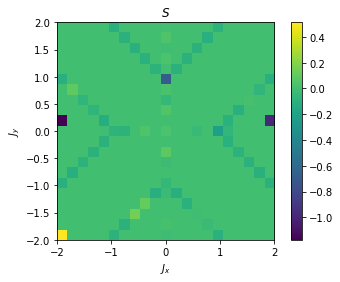

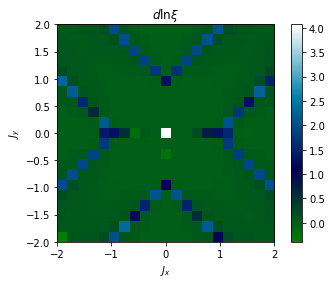

In [49]:
plt.imshow(S-S2, extent=[Jx_list[0], Jx_list[-1], Jy_list[0], Jy_list[-1]], origin='lower',
           cmap='viridis')

plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$S$")
plt.xlabel(r'$J_x$')
plt.ylabel(r'$J_y$')
plt.show()

plt.imshow(-np.log(Xi) + np.log(Xi3), extent=[Jx_list[0], Jx_list[-1], Jy_list[0], Jy_list[-1]], origin='lower',
           cmap='ocean')

plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$d \ln\xi$")
plt.xlabel(r'$J_x$')
plt.ylabel(r'$J_y$')
plt.show()

Text(0, 0.5, '$J_y$')

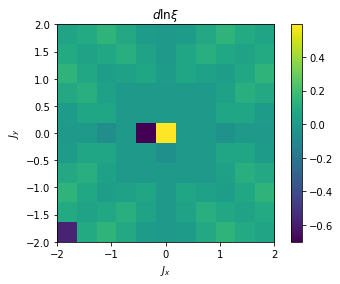

In [37]:
Xi = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Jx = X[i, j]
        Jy = Y[i, j]
        Xi[i, j] = xi_dict[(Jx, Jy, Jz, chi)]

plt.imshow(np.log(Xi2) - np.log(Xi), extent=[Jx_list[0], Jx_list[-1], Jy_list[0], Jy_list[-1]], origin='lower',
           cmap='viridis')

plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$d \ln\xi$")
plt.xlabel(r'$J_x$')
plt.ylabel(r'$J_y$')

In [16]:
finite_scaling(Jx=-1, Jy=1, Jz=-1, L=6, chi_list=[int(2**n) for n in np.arange(3, 7, .5)])

Reading 'L'=6 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1 for config KitaevLadderModel
Reading 'Jy'=1 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
..
swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "


Before the canonicalization:
Bond dim =  [4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-7.258619021939502e-17j)
After the canonicalization:
Bond dim =  [4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Reading 'L'=6 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1 for config KitaevLadderModel
Reading 'Jy'=1 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  11 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
..
sw

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 840
Energy = -0.2097012464701962, S = nan, norm_err = 4.2e-10
Current memory usage 468.3 MB, time elapsed: 6.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1069e-11, max_E_trunc = 1.4978e-11
MPS bond dimensions: [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
Updating environment
..
sweep 10, age = 1176
Energy = -0.2097012464757431, S = nan, norm_err = 2.8e-10
Current memory usage 468.3 MB, time elapsed: 12.2 s
Delta E = -1.1094e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0646e-12, max_E_trunc = 1.1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 22, 20, 22, 20, 22, 21, 22, 21, 22, 21, 22, 22, 22, 21, 22, 21, 22, 21, 22, 21, 22, 21, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000144-4.654970527551992e-16j)
After the canonicalization:
Bond dim =  [21, 22, 20, 22, 20, 22, 21, 22, 21, 22, 21, 22, 22, 22, 21, 22, 21, 22, 21, 22, 21, 22, 21, 22]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=6 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1 for config KitaevLadderModel
Reading 'Jy'=1 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 26, 32, 27, 32, 26, 32, 27, 32, 26, 32, 27, 32, 27, 32, 27, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000149+2.4241361493827565e-17j)
After the canonicalization:
Bond dim =  [27, 32, 27, 32, 27, 32, 27, 32, 26, 32, 27, 32, 26, 32, 27, 32, 26, 32, 27, 32, 27, 32, 27, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=6 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1 for config KitaevLadderModel
Reading 'Jy'=1 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  45 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 27, 38, 28, 38, 27, 38, 28, 38, 27, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000189+1.2511953946704308e-15j)
After the canonicalization:
Bond dim =  [28, 38, 28, 38, 28, 38, 27, 38, 28, 38, 27, 38, 28, 38, 27, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=45 done.
============================== END ==============================
Reading 'L'=6 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1 for config KitaevLadderModel
Reading 'Jy'=1 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [28, 38, 27, 38, 28, 38, 27, 38, 28, 38, 27, 38, 27, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000202+1.3344497601302436e-16j)
After the canonicalization:
Bond dim =  [28, 38, 27, 38, 28, 38, 27, 38, 28, 38, 27, 38, 27, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=6 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'bc'='periodic' for config KitaevLadderModel
Reading 'bc_MPS'='infinite' for config KitaevLadderModel
Reading 'Jx'=-1 for config KitaevLadderModel
Reading 'Jy'=1 for config KitaevLadderModel
Reading 'Jz'=-1 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [27, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-5.145250170918534e-16j)
After the canonicalization:
Bond dim =  [27, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38, 28, 38]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================


([1.1444974126282363,
  0.5300817101860846,
  0.5300859647590621,
  0.5300860473507872,
  0.5300860499868617,
  0.5300860500241774,
  0.5300860500246846,
  0.5300860500246908],
 [2.3918500603064223,
  1.7569269858643324,
  1.8159016581321112,
  1.916807895456596,
  1.9384867086403004,
  1.9684611611772038,
  1.9697593397168087,
  1.9704272931125568])